In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

from scipy import stats

# EDA part

## Fetching and understanding the data

In [ ]:
# Reading the dataset 
df = pd.read_csv('/content/drive/MyDrive/000/data.csv')

df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  \
0         0.2419                 0.07871     1.0950      0.9053         8.589   
1         0.1812                 0.05667     0.5435      0.7339         3.398   
2         0.2069                 0.05999     0.7456      0.7869         4.585   
3         0.2597                 0.09744     0.4956      1.1560         3.445   
4         0.1809                 0.05883     0.7572      0.7813         5.438   

   area_se  smoothness_se  compactness_se  concavity_se  concave points_se  \
0   153.40       0.006399         0.04904       0.05373            0.01587   
1    74.08       0.005225         0.01308       0.01860            0.01340   
2    94.03       0.006150         0.04006       0.03832            0.02058   
3    27.23       0.009110         0.07458       0.05661            0.01867   
4    94.44       0.011490         0.02461       0.05688            0.01885   

   symmetry_se  fractal_dimension_se  radius_worst  texture_worst  \
0      0.03003              0.006193         25.38          17.33   
1      0.01389              0.003532         24.99          23.41   
2      0.02250              0.004571         23.57          25.53   
3      0.05963              0.009208         14.91          26.50   
4      0.01756              0.005115         22.54          16.67   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0           184.60      2019.0            0.1622             0.6656   
1           158.80      1956.0            0.1238             0.1866   
2           152.50      1709.0            0.1444             0.4245   
3            98.87       567.7            0.2098             0.8663   
4           152.20      1575.0            0.1374             0.2050   

   concavity_worst  concave points_worst  symmetry_worst  \
0           0.7119                0.2654          0.4601   
1           0.2416                0.1860          0.2750   
2           0.4504                0.2430          0.3613   
3           0.6869                0.2575          0.6638   
4           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN

In [ ]:
#observe the different feature type present in the data

#Number of Rows and Colimn in Dtataset
print("Number of Rows and Columns-->",df.shape)

#variable type
print("\n", df.dtypes)

Number of Rows and Columns--> (569, 33)

 id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_w

In [ ]:
# EDA-summary of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Checking Descriptive Statistics
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean   radius_se  texture_se  \
count     569.000000              569.000000  569.000000  569.000000   
mean        0.181162                0.062798    0.405172    1.216853   
std         0.027414                0.007060    0.277313    0.551648   
min         0.106000                0.049960    0.111500    0.360200   
25%         0.161900                0.057700    0.232400    0.833900   
50%         0.179200                0.061540    0.324200    1.108000   
75%         0.195700                0.066120    0.478900    1.474000   
max         0.304000                0.097440    2.873000    4.885000   

       perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  \
count    569.000000  569.000000     569.000000      569.000000    569.000000   
mean       2.866059   40.337079       0.007041        0.025478      0.031894   
std        2.021855   45.491006       0.003003        0.017908      0.030186   
min        0.757000    6.802000       0.001713        0.002252      0.000000   
25%        1.606000   17.850000       0.005169        0.013080      0.015090   
50%        2.287000   24.530000       0.006380        0.020450      0.025890   
75%        3.357000   45.190000       0.008146        0.032450      0.042050   
max       21.980000  542.200000       0.031130        0.135400      0.396000   

       concave points_se  symmetry_se  fractal_dimension_se  radius_worst  \
count         569.000000   569.000000            569.000000    569.000000   
mean            0.011796     0.020542              0.003795     16.269190   
std             0.006170     0.008266              0.002646      4.833242   
min             0.000000     0.007882              0.000895      7.930000   
25%             0.007638     0.015160              0.002248     13.010000   
50%             0.010930     0.018730              0.003187     14.970000   
75%             0.014710     0.023480              0.004558     18.790000   
max             0.052790     0.078950              0.029840     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%    

In [ ]:
for i in df.columns.tolist():
  df1 = df.drop_duplicates(subset=[i], keep=False)
  df1

In [ ]:

#for i in df.columns.tolist():
  #print(i)
  #print(i,df[i].unique().sum())
print(df.nunique())

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

## Treating Null Values

#### Treating Null Values in Columns

In [ ]:
# Cheking percent of missing values in columns
df_null_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_null_columns

null
Unnamed: 32              100.0
compactness_se             0.0
fractal_dimension_worst    0.0
symmetry_worst             0.0
concave points_worst       0.0
concavity_worst            0.0
compactness_worst          0.0
smoothness_worst           0.0
area_worst                 0.0
perimeter_worst            0.0
texture_worst              0.0
radius_worst               0.0
fractal_dimension_se       0.0
symmetry_se                0.0
concave points_se          0.0
concavity_se               0.0
id                         0.0
diagnosis                  0.0
area_se                    0.0
perimeter_se               0.0
texture_se                 0.0
radius_se                  0.0
fractal_dimension_mean     0.0
symmetry_mean              0.0
concave points_mean        0.0
concavity_mean             0.0
compactness_mean           0.0
smoothness_mean            0.0
area_mean                  0.0
perimeter_mean             0.0
texture_mean               0.0
radius_mean                0.0
smoothness_se              0.0

It is seen that no column contains the null value. So, any further action is not required.

### Here distribution of our classes is observe

In [ ]:
classes=df['diagnosis'].value_counts()
B_cls=classes[0]/df['diagnosis'].count()*100
M_cls=classes[1]/df['diagnosis'].count()*100
print(B_cls)
print(M_cls)

62.741652021089635
37.258347978910365


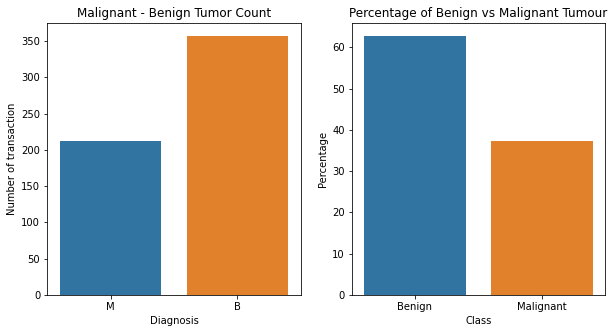

In [ ]:
# Create a bar plot for the number and percentage of Malignant vs Benign Tumours
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(df["diagnosis"])
plt.ylabel("Number of transaction")
plt.xlabel("Diagnosis")
plt.title("Malignant - Benign Tumor Count")

plt.subplot(1,2,2)
Tumour_percentage = {'Class':['Benign', 'Malignant'], 'Percentage':[B_cls, M_cls]} 
df_Tumour_percentage = pd.DataFrame(Tumour_percentage) 
sns.barplot(x='Class',y='Percentage', data=df_Tumour_percentage)
plt.title('Percentage of Benign vs Malignant Tumour')

plt.show()

In [ ]:

df.diagnosis = np.where(df.diagnosis == 'M',1,0)

In [ ]:
trans = MinMaxScaler()
trans.fit_transform(df)

array([[9.14760426e-04, 1.00000000e+00, 5.21037437e-01, ...,
        5.98462448e-01, 4.18863964e-01,            nan],
       [9.14996350e-04, 1.00000000e+00, 6.43144493e-01, ...,
        2.33589592e-01, 2.22878132e-01,            nan],
       [9.24954884e-02, 1.00000000e+00, 6.01495575e-01, ...,
        4.03705894e-01, 2.13433032e-01,            nan],
       ...,
       [1.00765069e-03, 1.00000000e+00, 4.55251077e-01, ...,
        1.28720678e-01, 1.51908697e-01,            nan],
       [1.00796562e-03, 1.00000000e+00, 6.44564343e-01, ...,
        4.97141731e-01, 4.52315361e-01,            nan],
       [9.22636984e-05, 0.00000000e+00, 3.68687586e-02, ...,
        2.57441356e-01, 1.00682146e-01,            nan]])

## Train-Test Split

In [ ]:
#y= df["diagnosis"]
#X = df.drop("diagnosis", axis = 1)

# y includes our outcome label and X includes our features
y = df.diagnosis # M or B 
#y = np.where(y == 'M',1,0)
list_drp = ['Unnamed: 32','id','diagnosis']
X = df.drop(list_drp,axis = 1 )

In [ ]:
#scaler = StandardScaler()
#scaler.fit_transform(df)
#df.head()

In [ ]:
from sklearn import model_selection
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state = 42)


#Checking if the numerical variables are distributed normaly or not--- Shapiro–Wilk test

In [ ]:
test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(X)
normal = normal.apply(test_normality)
print(not normal.any())

False


In [ ]:
col_srray=df.columns.tolist()
for i in col_srray:
  print(f'{i} ---> {stats.shapiro(df[i])}')


id ---> ShapiroResult(statistic=0.22388023138046265, pvalue=3.0688436368713494e-43)
diagnosis ---> ShapiroResult(statistic=0.6124988794326782, pvalue=8.905348673867872e-34)
radius_mean ---> ShapiroResult(statistic=0.9410696029663086, pvalue=3.1061551985026026e-14)
texture_mean ---> ShapiroResult(statistic=0.9767200946807861, pvalue=7.281473557441132e-08)
perimeter_mean ---> ShapiroResult(statistic=0.9361826181411743, pvalue=7.01163031715385e-15)
area_mean ---> ShapiroResult(statistic=0.8584018349647522, pvalue=3.196511088521129e-22)
smoothness_mean ---> ShapiroResult(statistic=0.987487256526947, pvalue=8.59934589243494e-05)
compactness_mean ---> ShapiroResult(statistic=0.9169784784317017, pvalue=3.967941392408286e-17)
concavity_mean ---> ShapiroResult(statistic=0.8668309450149536, pvalue=1.3385831077542155e-21)
concave points_mean ---> ShapiroResult(statistic=0.8916499018669128, pvalue=1.4044357116065472e-19)
symmetry_mean ---> ShapiroResult(statistic=0.972588062286377, pvalue=7.881995

In [ ]:
def uv(df,col,vartype,kk,hue =None):  
    
    if vartype == 0:
        #plt.style.use("seaborn")
        plt.figure(figsize=(9, 1)) 
        ax1=plt.subplot(1,3,1*kk)
        ax1=sns.distplot(col)
        ax1.set_title("Distribution Plot")
        ax2=plt.subplot(1,3,2*kk)
        ax2=sns.violinplot(data =df, y=col, inner="quartile")
        ax2.set_title("Violin Plot")
        ax3=plt.subplot(1,3,3*kk)
        ax3=sns.boxplot(data =df, y=col)
        ax3.set_title("Box Plot")

In [ ]:
def uv_dist(df,col,vartype,kk,hue =None):  
    


        plt.subplot(11,9,kk+1)
        sns.distplot(col)
        #plt.title("Distribution Plot")
        plt.subplot(11,9,kk+2)
        sns.violinplot(data =df, y=col, inner="quartile")
        #plt.title("Violin Plot")
        plt.subplot(11,9,kk+3)
        sns.boxplot(data =df, y=col)
        #plt.title("Box Plot")

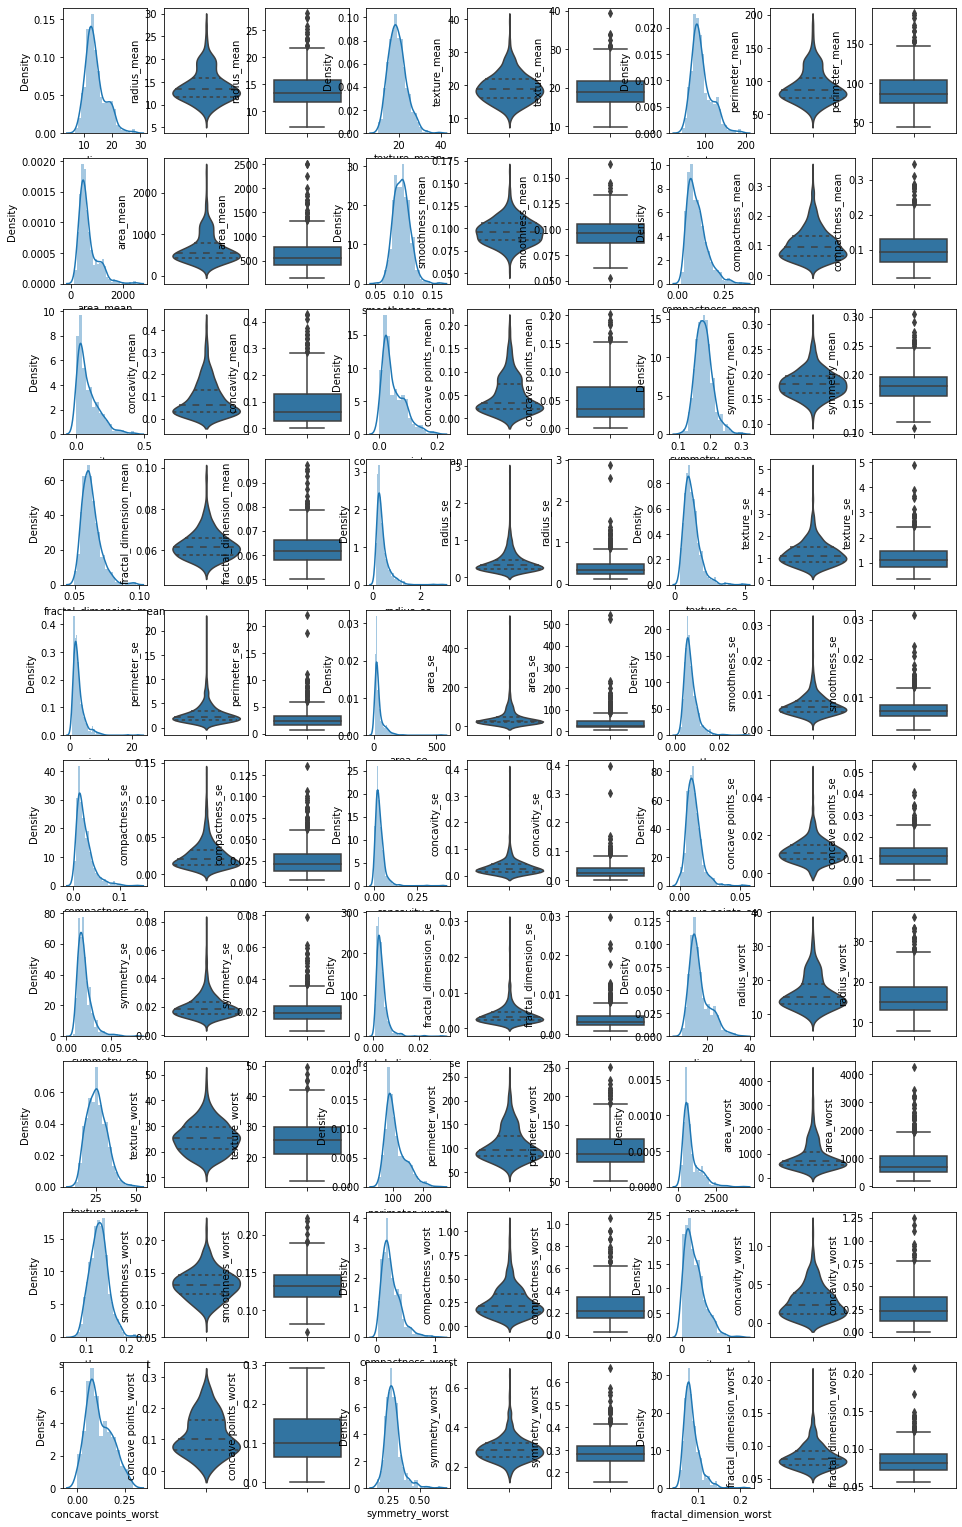

In [ ]:
lst=X_train.columns.tolist()
k=0
#plt.style.use("seaborn")
plt.figure(figsize=(16, 30)) 
for i in lst:
  k=k+1
  n=(k-1)*3
  uv_dist(df,df[i],0,n)

In [ ]:
df_skew = pd.DataFrame(data={
    'skewness': df.skew()
})

df_skew

skewness
id                       6.473752
diagnosis                0.528461
radius_mean              0.942380
texture_mean             0.650450
perimeter_mean           0.990650
area_mean                1.645732
smoothness_mean          0.456324
compactness_mean         1.190123
concavity_mean           1.401180
concave points_mean      1.171180
symmetry_mean            0.725609
fractal_dimension_mean   1.304489
radius_se                3.088612
texture_se               1.646444
perimeter_se             3.443615
area_se                  5.447186
smoothness_se            2.314450
compactness_se           1.902221
concavity_se             5.110463
concave points_se        1.444678
symmetry_se              2.195133
fractal_dimension_se     3.923969
radius_worst             1.103115
texture_worst            0.498321
perimeter_worst          1.128164
area_worst               1.859373
smoothness_worst         0.415426
compactness_worst        1.473555
concavity_worst          1.150237
concave points_worst     0.492616
symmetry_worst           1.433928
fractal_dimension_worst  1.662579
Unnamed: 32                   NaN

### Plotting the distribution of a variable

### There is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[X_train.columns] = pt.fit_transform(X_train)

In [ ]:
X_test[X_train.columns] = pt.transform(X_test)

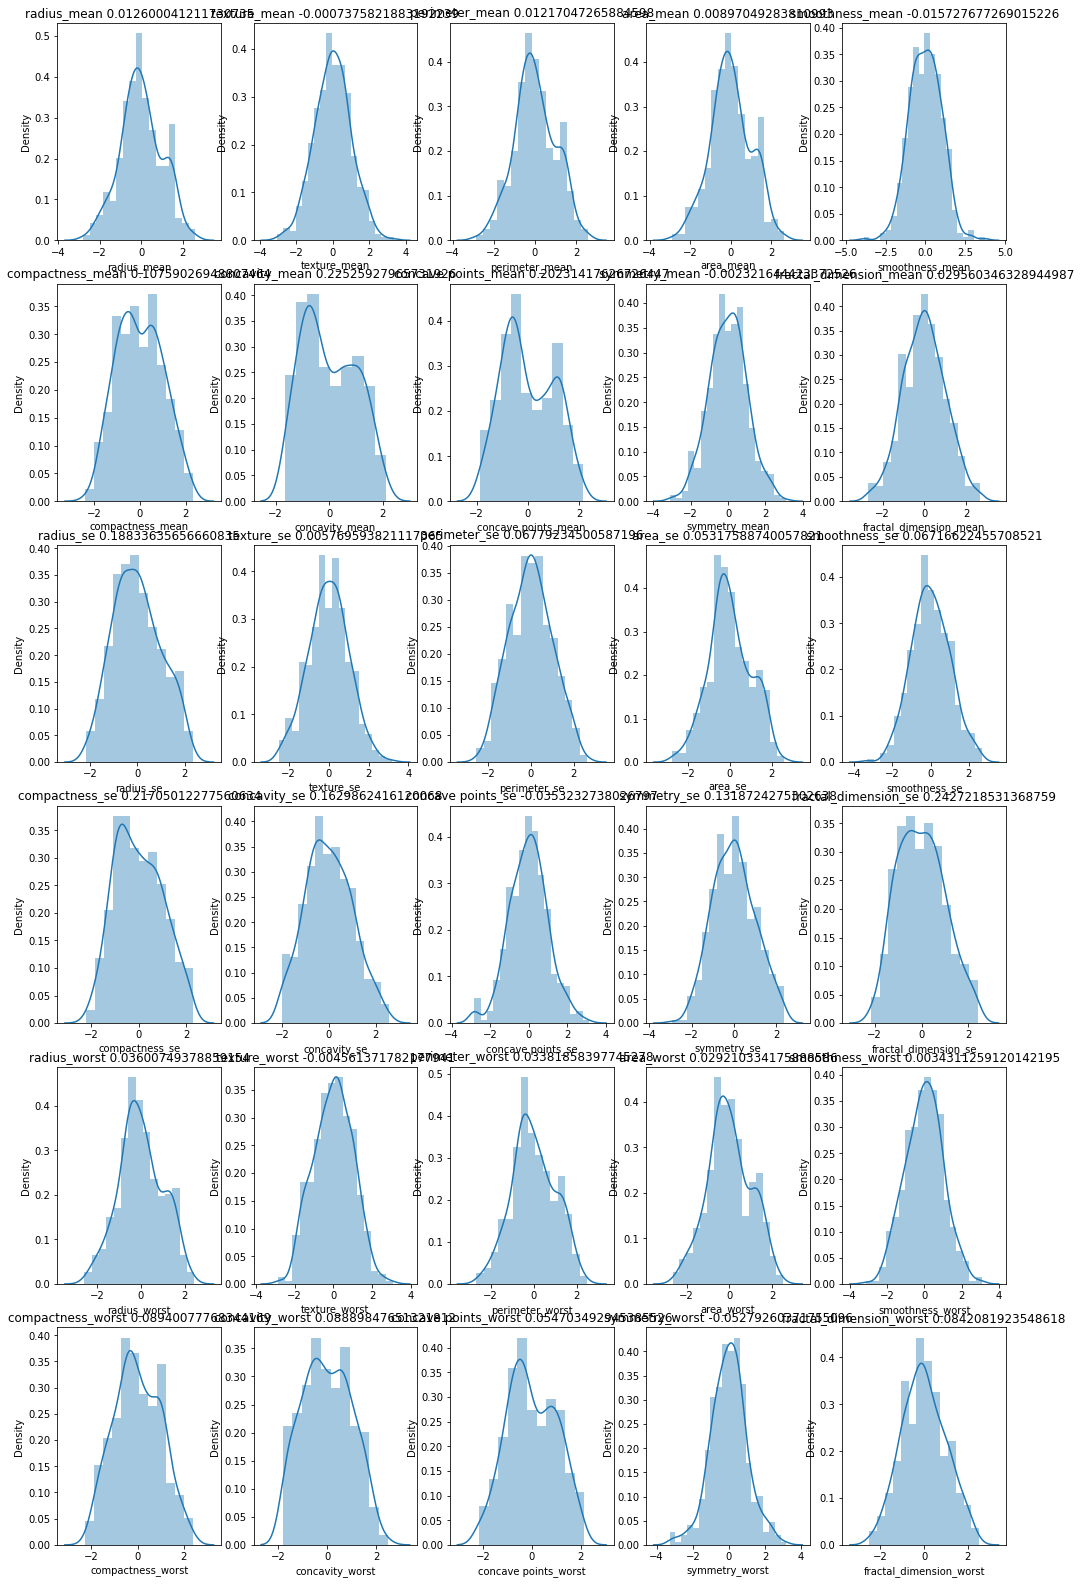

In [ ]:
# plot the histogram of a variable from the dataset again to see the result 
k=0
plt.figure(figsize=(17,28))
for col in X_train.columns :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

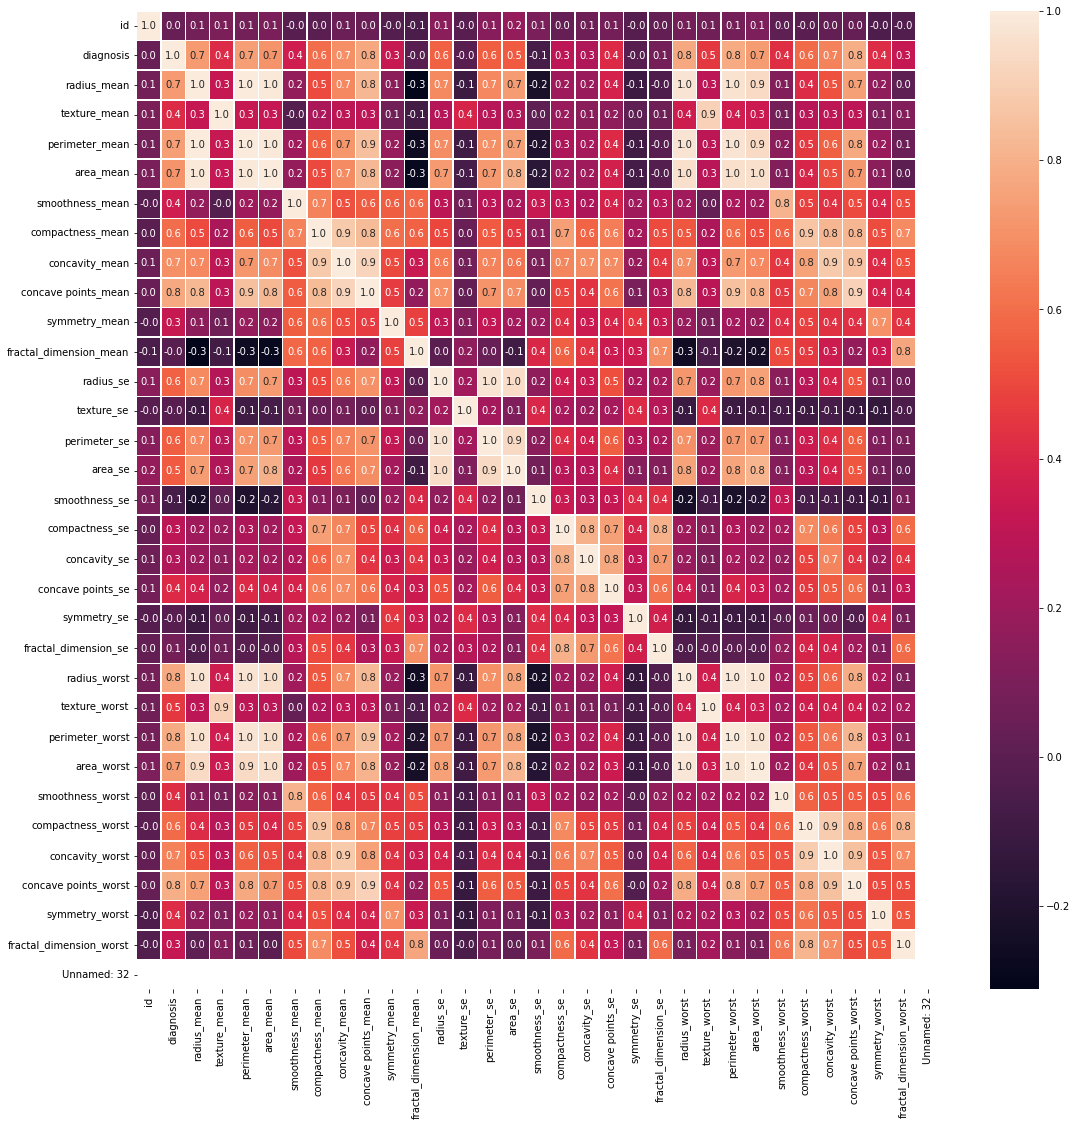

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [ ]:
# Find most important features relative to target
corr=df.corr()
corr.sort_values(['diagnosis'], ascending=False, inplace=True)
corr.diagnosis[:25]

diagnosis                  1.000000
concave points_worst       0.793566
perimeter_worst            0.782914
concave points_mean        0.776614
radius_worst               0.776454
perimeter_mean             0.742636
area_worst                 0.733825
radius_mean                0.730029
area_mean                  0.708984
concavity_mean             0.696360
concavity_worst            0.659610
compactness_mean           0.596534
compactness_worst          0.590998
radius_se                  0.567134
perimeter_se               0.556141
area_se                    0.548236
texture_worst              0.456903
smoothness_worst           0.421465
symmetry_worst             0.416294
texture_mean               0.415185
concave points_se          0.408042
smoothness_mean            0.358560
symmetry_mean              0.330499
fractal_dimension_worst    0.323872
compactness_se             0.292999
Name: diagnosis, dtype: float64

In [ ]:
col_list=corr.diagnosis[:10].index.tolist()
col_list

['diagnosis',
 'concave points_worst',
 'perimeter_worst',
 'concave points_mean',
 'radius_worst',
 'perimeter_mean',
 'area_worst',
 'radius_mean',
 'area_mean',
 'concavity_mean']

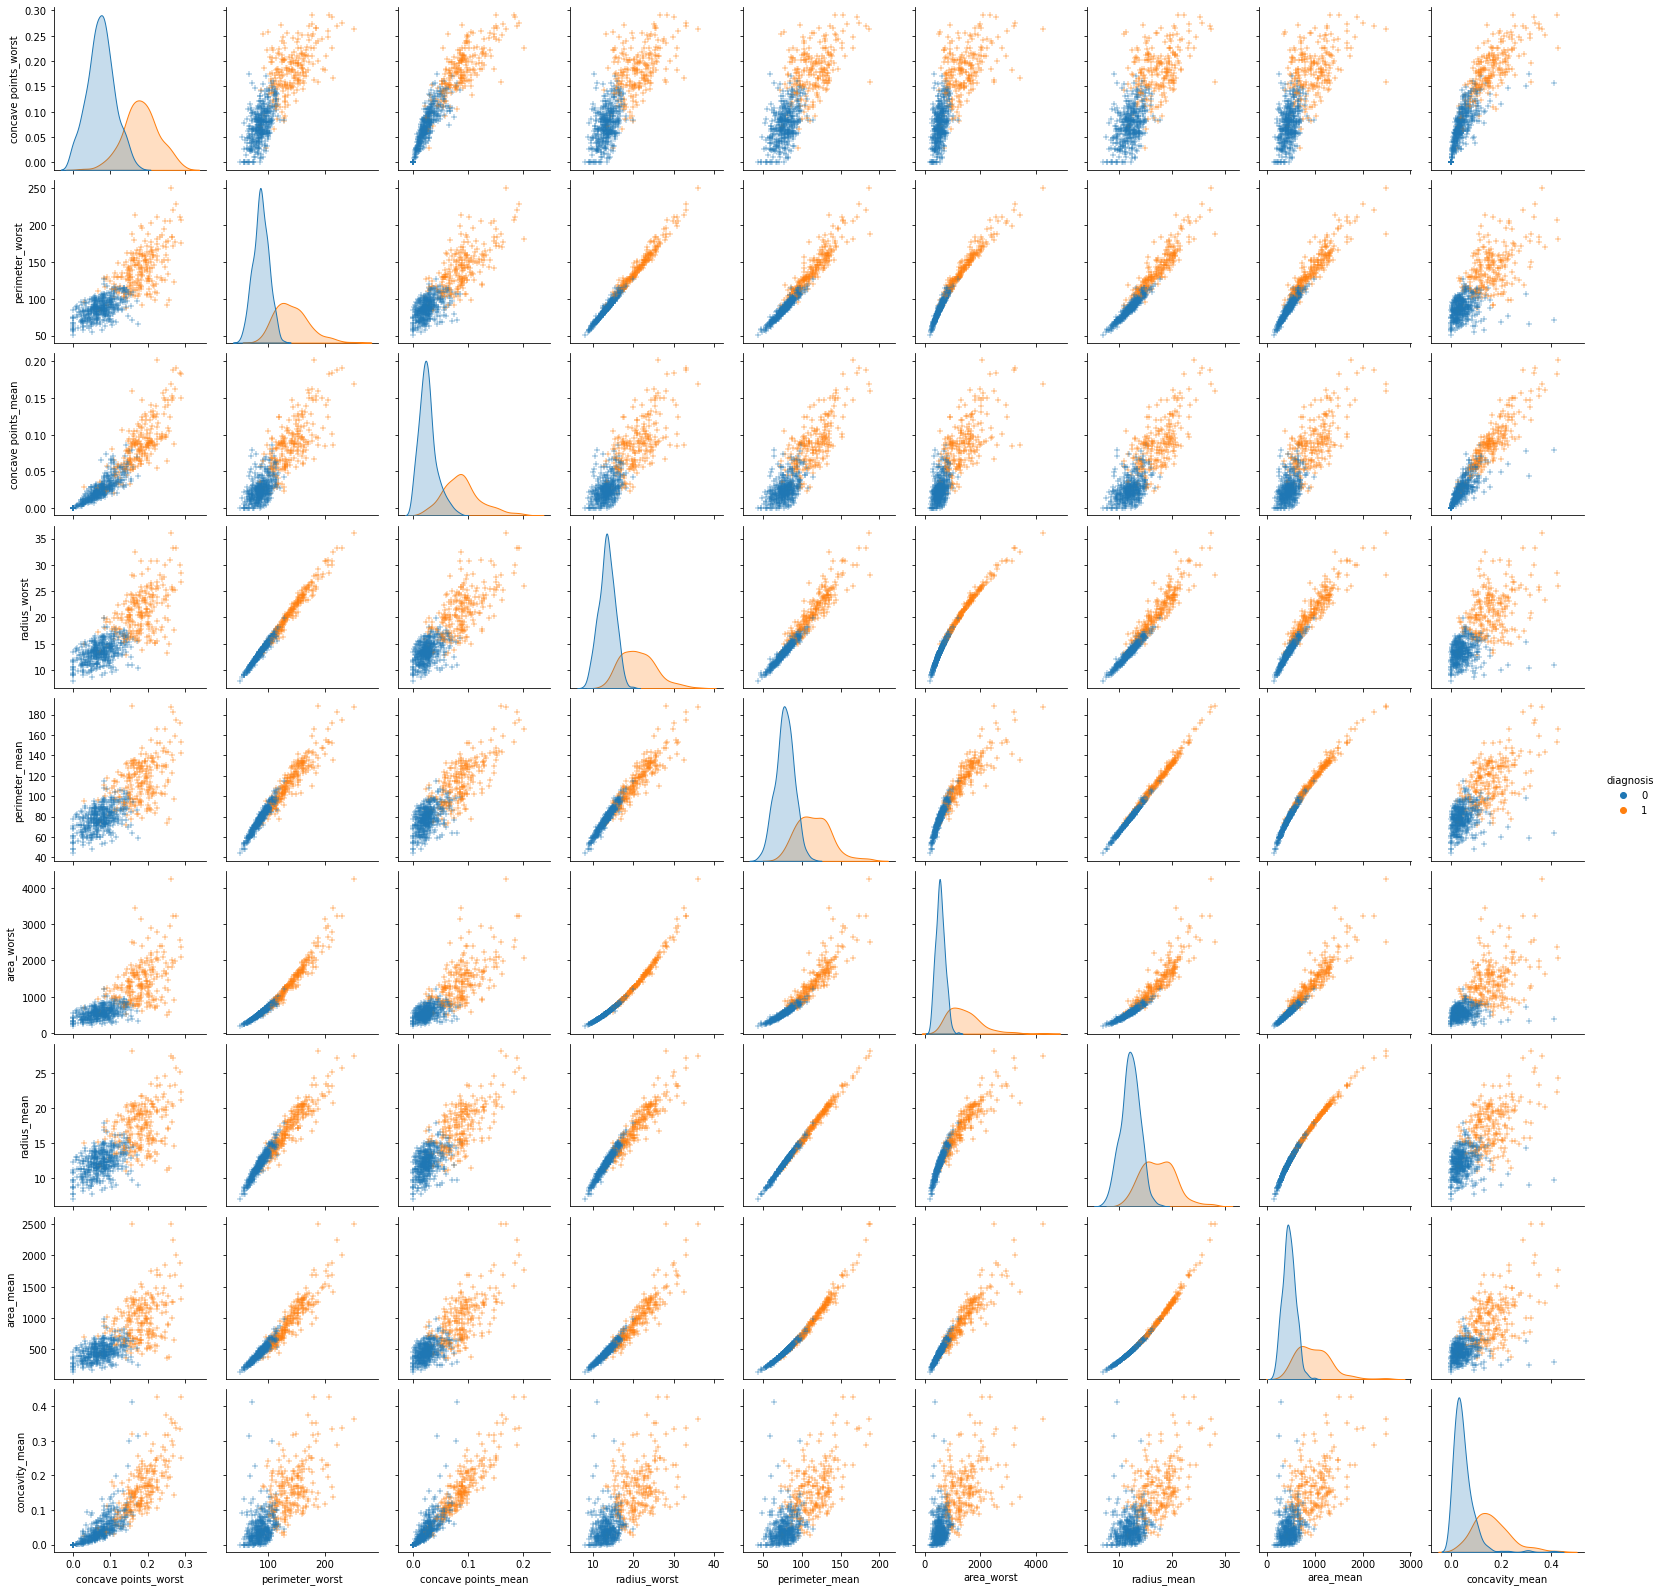

In [ ]:

#pair plot 
sns.pairplot(df[col_list], diag_kind = "kde", markers = "+",hue = "diagnosis")
plt.show()

Now we can see that all the variables are normally distributed after the transformation.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

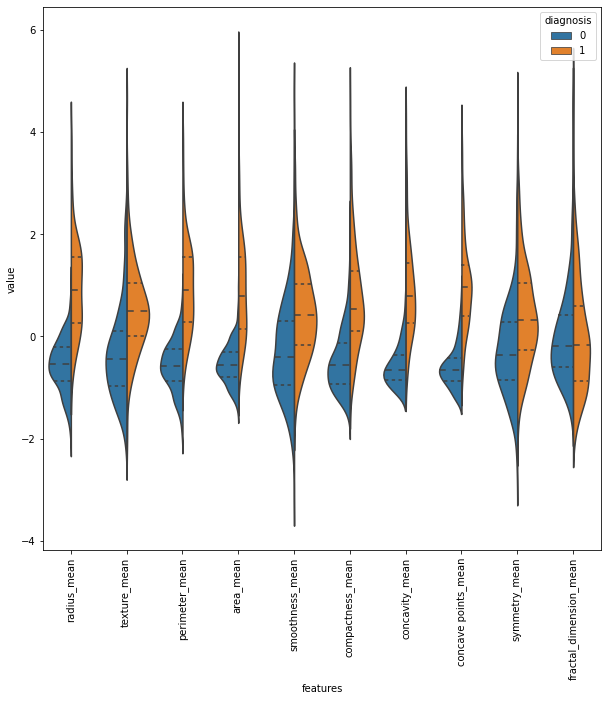

In [ ]:
# first ten features
data_dia = y
data = X
data_n_2 = (data - data.mean()) / (data.std())
data = pd.concat([df.diagnosis,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

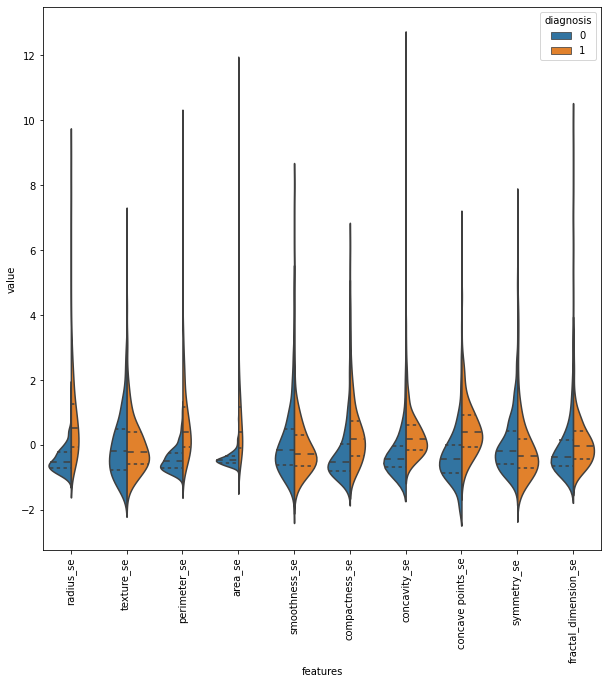

In [ ]:
# Second ten features
data = pd.concat([df.diagnosis,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

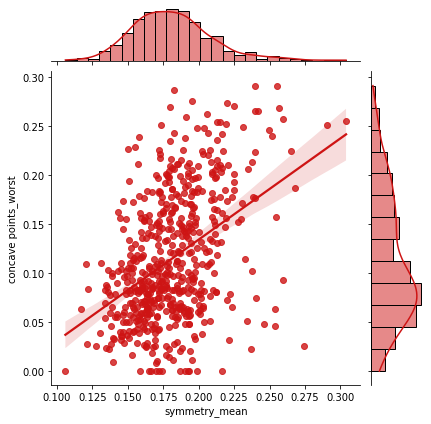

In [ ]:
sns.jointplot(X.loc[:,'symmetry_mean'], X.loc[:,'concave points_worst'], kind="reg", color="#ce1414")

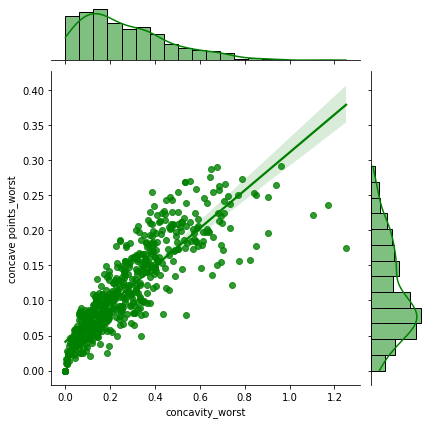

In [ ]:
sns.jointplot(X.loc[:,'concavity_worst'], X.loc[:,'concave points_worst'], kind="reg",color="g")

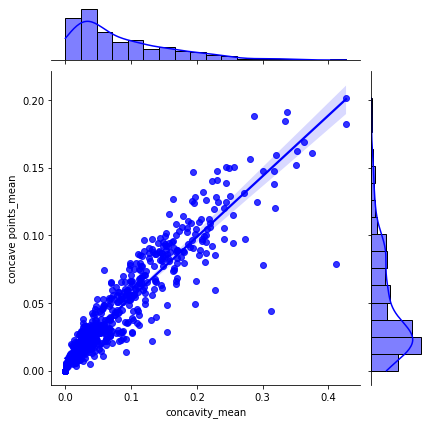

In [ ]:
sns.jointplot(X.loc[:,'concavity_mean'], X.loc[:,'concave points_mean'], kind="reg",color="b")

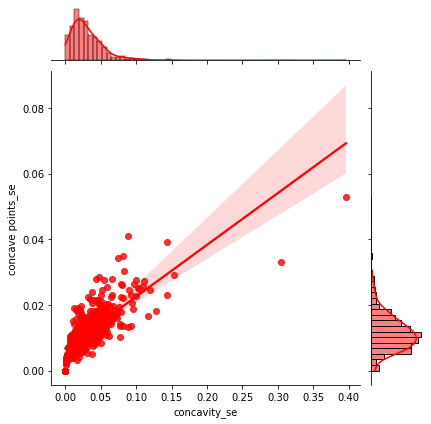

In [ ]:
sns.jointplot(X.loc[:,'concavity_se'], X.loc[:,'concave points_se'], kind="reg",color="r")

In [ ]:
#Standardizing the data first to view it in a single graph plot
std = (df - df.mean())/ (df.std())
std_data =pd.concat([df['diagnosis'], std], axis=1)
std_data.describe()

diagnosis            id     diagnosis   radius_mean  texture_mean  \
count  569.000000  5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean     0.372583  1.873136e-17  7.492542e-17 -1.311195e-16  6.243785e-17   
std      0.483918  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min      0.000000 -2.428653e-01 -7.699311e-01 -2.027864e+00 -2.227289e+00   
25%      0.000000 -2.359820e-01 -7.699311e-01 -6.887793e-01 -7.253249e-01   
50%      0.000000 -2.356876e-01 -7.699311e-01 -2.148925e-01 -1.045442e-01   
75%      1.000000 -1.724412e-01  1.296535e+00  4.689800e-01  5.836621e-01   
max      1.000000  7.046429e+00  1.296535e+00  3.967796e+00  4.647799e+00   

       perimeter_mean     area_mean  smoothness_mean  compactness_mean  \
count    5.690000e+02  5.690000e+02     5.690000e+02      5.690000e+02   
mean    -1.248757e-16 -2.185325e-16    -8.366672e-16      1.998011e-16   
std      1.000000e+00  1.000000e+00     1.000000e+00      1.000000e+00   
min     -1.982759e+00 -1.453164e+00    -3.109349e+00     -1.608721e+00   
25%     -6.913472e-01 -6.666089e-01    -7.103378e-01     -7.464292e-01   
50%     -2.357726e-01 -2.949274e-01    -3.486040e-02     -2.217454e-01   
75%      4.992377e-01  3.631877e-01     6.356397e-01      4.934227e-01   
max      3.972634e+00  5.245913e+00     4.766717e+00      4.564409e+00   

       concavity_mean  concave points_mean  symmetry_mean  \
count    5.690000e+02         5.690000e+02   5.690000e+02   
mean     3.746271e-17        -4.995028e-17   1.748260e-16   
std      1.000000e+00         1.000000e+00   1.000000e+00   
min     -1.113893e+00        -1.260710e+00  -2.741705e+00   
25%     -7.430941e-01        -7.372951e-01  -7.026215e-01   
50%     -3.419391e-01        -3.973715e-01  -7.156354e-02   
75%      5.255994e-01         6.463664e-01   5.303125e-01   
max      4.239858e+00         3.924477e+00   4.480808e+00   

       fractal_dimension_mean     radius_se    texture_se  perimeter_se  \
count            5.690000e+02  5.690000e+02  5.690000e+02  5.690000e+02   
mean             4.838933e-16  2.497514e-16 -1.123881e-16 -1.373633e-16   
std              1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min             -1.818265e+00 -1.058992e+00 -1.552898e+00 -1.043131e+00   
25%             -7.220040e-01 -6.230224e-01 -6.941984e-01 -6.232195e-01   
50%             -1.781226e-01 -2.919882e-01 -1.973239e-01 -2.864000e-01   
75%              4.705693e-01  2.658657e-01  4.661422e-01  2.428171e-01   
max              4.906602e+00  8.899079e+00  6.649429e+00  9.453668e+00   

            area_se  smoothness_se  compactness_se  concavity_se  \
count  5.690000e+02   5.690000e+02    5.690000e+02  5.690000e+02   
mean  -1.186319e-16  -1.545337e-16    1.873136e-16  1.685822e-16   
std    1.000000e+00   1.000000e+00    1.000000e+00  1.000000e+00   
min   -7.371804e-01  -1.774504e+00   -1.296957e+00 -1.056571e+00   
25%   -4.943192e-01  -6.234697e-01   -6.923171e-01 -5.566714e-01   
50%   -3.474770e-01  -2.201415e-01   -2.807733e-01 -1.988904e-01   
75%    1.066787e-01   3.680315e-01    3.893116e-01  3.364561e-01   
max    1.103214e+01   8.022940e+00    6.138081e+00  1.206207e+01   

       concave points_se   symmetry_se  fractal_dimension_se  radius_worst  \
count       5.690000e+02  5.690000e+02          5.690000e+02  5.690000e+02   
mean        2.497514e-17  9.365678e-17         -6.243785e-18 -8.241796e-16   
std         1.000000e+00  1.000000e+00          1.000000e+00  1.000000e+00   
min        -1.911765e+00 -1.531542e+00         -1.096004e+00 -1.725382e+00   
25%        -6.738971e-01 -6.511078e-01         -5.846041e-01 -6.743279e-01   
50%        -1.403723e-01 -2.192375e-01         -2.297383e-01 -2.688030e-01   
75%         4.722412e-01  3.553798e-01          2.883884e-01  5.215568e-01   
max         6.643755e+00  7.065700e+00          9.842932e+00  4.090590e+00   

       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
count   5.690000e+02     5.690000e

In [ ]:
set1 = pd.concat([df['diagnosis'], std['radius_mean'], std['perimeter_mean'], std['area_mean'],std['radius_se'], std['perimeter_se'],std['area_se'], std['radius_worst'],std['perimeter_worst'],std['area_worst']], axis=1)
set1.head()

diagnosis  radius_mean  perimeter_mean  area_mean  radius_se  perimeter_se  \
0          1     1.096100        1.268817   0.983510   2.487545      2.830540   
1          1     1.828212        1.684473   1.907030   0.498816      0.263095   
2          1     1.578499        1.565126   1.557513   1.227596      0.850180   
3          1    -0.768233       -0.592166  -0.763792   0.326087      0.286341   
4          1     1.748758        1.775011   1.824624   1.269426      1.272070   

    area_se  radius_worst  perimeter_worst  area_worst  
0  2.485391      1.885031         2.301575    1.999478  
1  0.741749      1.804340         1.533776    1.888827  
2  1.180298      1.510541         1.346291    1.455004  
3 -0.288125     -0.281217        -0.249720   -0.549538  
4  1.189310      1.297434         1.337363    1.219651

Categorizing the data into the following sets of variables, for ease of analysis, and visualizing:

SET 1 : radius_mean, perimeter_mean, area_mean, radius_se, area_se, perimeter_se, radius_worst, perimeter_worst, area_worst
SET 2 : texture_mean, texture_worst
SET 3 : smoothness_mean, smoothness_worst
SET 4 : compactness_mean, concavity_mean, concave_points_mean, compactness_worst, concavity_worst, concave_points_worst

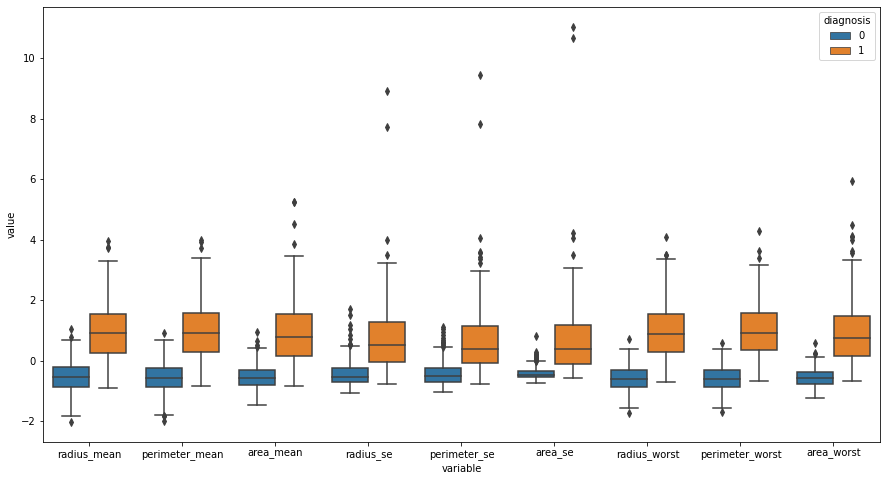

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x="variable", y="value", hue = 'diagnosis' , data=pd.melt(set1, id_vars='diagnosis'))

In [ ]:
#SET 2 
set2 = pd.concat([df['diagnosis'], std['texture_mean'], std['texture_worst']], axis=1)
set2

diagnosis  texture_mean  texture_worst
0            1     -2.071512      -1.358098
1            1     -0.353322      -0.368879
2            1      0.455786      -0.023953
3            1      0.253509       0.133866
4            1     -1.150804      -1.465481
..         ...           ...            ...
564          1      0.720838       0.117596
565          1      2.083301       2.045599
566          1      2.043775       1.373645
567          1      2.334403       2.235958
568          0      1.220718       0.763518

[569 rows x 3 columns]

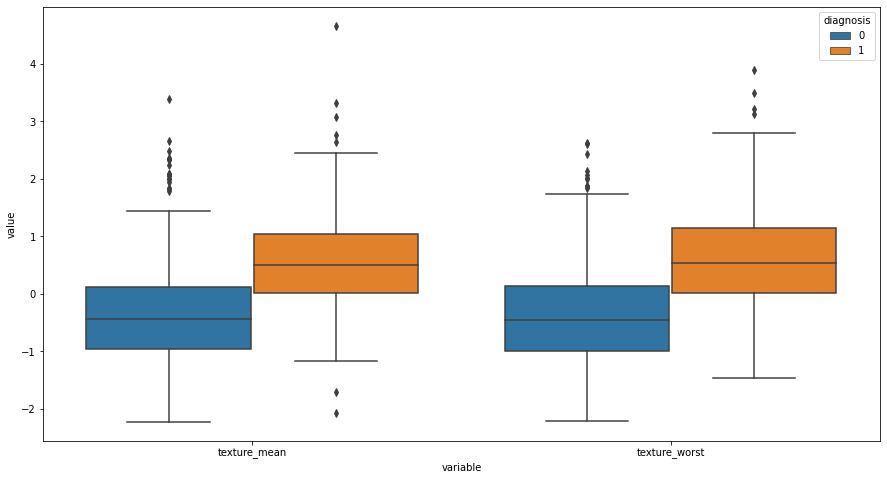

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis", data = pd.melt(set2, id_vars = "diagnosis"))

In [ ]:
#SET 3
set3 = pd.concat([df['diagnosis'], std['smoothness_mean'], std['smoothness_worst']], axis=1)
set3.head()

diagnosis  smoothness_mean  smoothness_worst
0          1         1.567087          1.306537
1          1        -0.826235         -0.375282
2          1         0.941382          0.526944
3          1         3.280667          3.391291
4          1         0.280125          0.220362

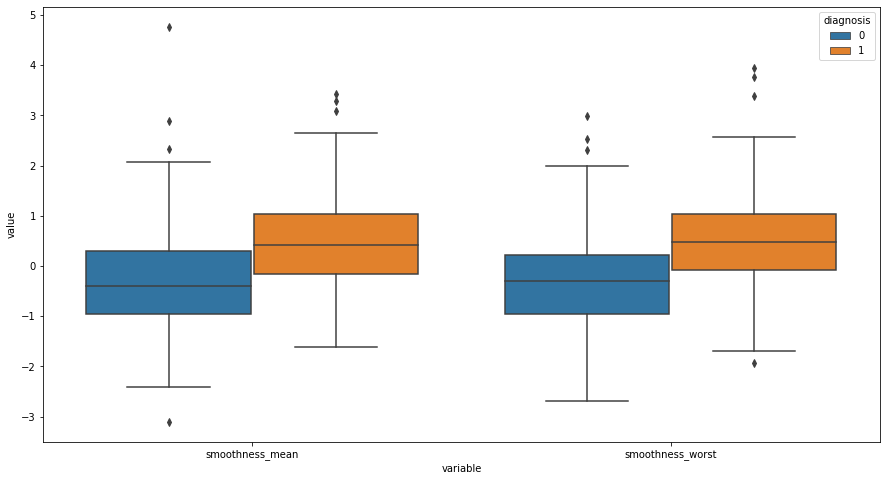

In [ ]:
plt.figure(figsize = (15, 8))
sns.boxplot(x= "variable", y = "value", hue = "diagnosis", data = pd.melt(set3, id_vars = "diagnosis"))

In [ ]:
#Defining upper and lower limits to identify outliers
#Tail =1
def outlier_limits(df, variable_name):
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    interval=3*iqr
    upper_l= q3+interval
    lower_l= q1-interval
    return lower_l, upper_l

In [ ]:
lower, upper = outlier_limits(df, 'radius_mean')
print(upper, lower)

28.02 -0.5400000000000009


In [ ]:
#Calculating the number of outliers, including -ve values
outliers=[i for i in df['radius_mean'] if i>upper or i<0]
len(outliers)

1

In [ ]:
#Deleting the outliers from the final dataset
lower, upper = outlier_limits(df, 'radius_mean')
df.drop(df.loc[df['radius_mean']>upper].index, inplace = True)
outliers=[i for i in df['radius_mean'] if i>upper or i<0]
len(outliers)

0

In [ ]:
df['diagnosis'] = np.where(df['diagnosis'] == 'M',1,0)                   

# Model Building

### Metric selection
As it has been seen that the data is balanced. Only, Accuracy will not be the good measure for evaluating the model as the study is pertaining to detection of cancer. 

So, ROC- AUC score is a good alternative. The ROC curve is used to indicate the goodness of the all most all classification model by evaluating the performance of the model at different classification thresholds. The threshold is 0.5 by default which does not work all time, the best threshold is considered to be the one at which the TPR is high and FPR is low, i.e., misclassifications are low. Having determined the optimal threshold, the F1 score is calculated for the classifier to measure the precision and recall at the selected threshold.


In [ ]:
#DataFrame for Merics to be used for comparative study
Train_scr_df=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_us=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_us=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_os=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_os=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_sm=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_sm=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_scr_df_Adasyn=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})
Test_scr_df_Adasyn=pd.DataFrame({'Metrics':['Accuracy','Sensitivity','Specificity','F1-Score','ROC']})


Train_pred_proba_df=pd.DataFrame()
Test_pred_proba_df=pd.DataFrame()

### Logistic regression

In [ ]:
# Logistic Regression
#from sklearn import linear_model #import the package

from sklearn.linear_model import LogisticRegression

# Importing packages for metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Importing packages for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [ ]:
# Creating KFold object with 10 splits
folds = KFold(n_splits=10, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.010857      0.004182         0.004161        0.000188    0.01   
1       0.015587      0.006781         0.005274        0.002953     0.1   
2       0.021172      0.006488         0.004533        0.000627       1   
3       0.033135      0.003794         0.004904        0.001567      10   
4       0.047462      0.009425         0.004293        0.000411     100   
5       0.043701      0.005050         0.004419        0.000532    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.990079           0.992647           0.972222   
1   {'C': 0.1}           1.000000           0.995098           0.974206   
2     {'C': 1}           0.996032           0.997549           0.976190   
3    {'C': 10}           0.994048           1.000000           0.976190   
4   {'C': 100}           0.994048           0.995098           0.976190   
5  {'C': 1000}           0.996032           0.992647           0.978175   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.994318           0.980645           1.000000                1.0   
1           0.998106           0.989247           1.000000                1.0   
2           1.000000           0.991398           1.000000                1.0   
3           1.000000           0.984946           1.000000                1.0   
4           1.000000           0.976344           0.998024                1.0   
5           1.000000           0.976344           0.996047                1.0   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           1.000000           0.997596           0.978610         0.990612   
1           1.000000           1.000000           0.989305         0.994596   
2           1.000000           1.000000           0.994652         0.995582   
3           1.000000           1.000000           1.000000         0.995518   
4           1.000000           1.000000           1.000000         0.993970   
5           0.997899           1.000000           1.000000         0.993714   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.009555                6            0.991940            0.992443   
1        0.007943                3            0.995713            0.996006   
2        0.007043                1            0.997870            0.998079   
3        0.007925                2            0.998948            0.999166   
4        0.009090                4            0.999692            0.999798   
5        0.008548                5            1.000000            1.000000   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.994096            0.992555            0.993175   
1            0.997767            0.996264            0.996486   
2            0.999307            0.997753            0.998472   
3            0.999949            0.998824            0.999720   
4            1.000000            0.999556            1.000000   
5            1.000000            1.000000            1.000000   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.991206            0.991410            0.991458   
1            0.995680            0.995564            0.995589   
2            0.998060            0.997692            0.997909   
3            0.999302            0.998923            0.999082   
4            0.999897            0.999590            0.999822   
5            1.000000            1.000000            1.000000   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.991747            0.992365          0.992239         0.000847  
1            0.995659            0.995755          0.996048         0.000642  
2            0.997779            0.997514          0.998044         0.000489  
3            0.998890            0.998995          0.9

In [ ]:
cv_results.to_excel("log_grd_train.xlsx")

print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


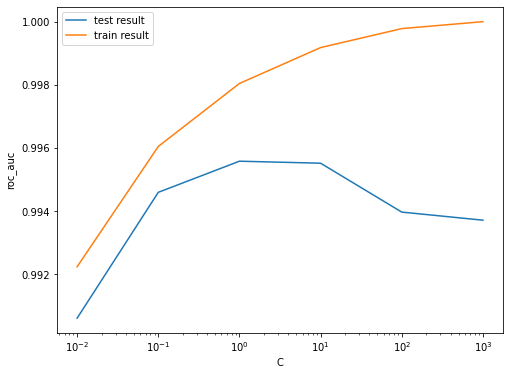

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with the best value of C
best_scr = model_cv.best_score_
best_C_val = model_cv.best_params_['C']

print(f" The highest test roc_auc found: {best_scr} at C = {best_C_val}")

 The highest test roc_auc found: 0.9955821497709542 at C = 1


#### Logistic regression with optimal C

In [ ]:
# Instantiating the model with the best value of C
logistic_data = LogisticRegression(C=1)

In [ ]:
# Fitting the model on the train set
logistic_model = logistic_data.fit(X_train, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = logistic_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train_predicted)
print(conf_mat)

[[284   2]
 [  4 165]]


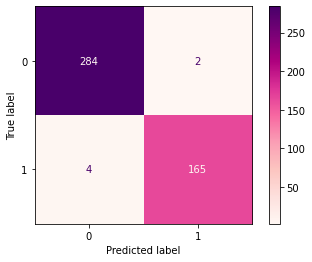

In [ ]:
plot_confusion_matrix(logistic_data, X_train, y_train, cmap='RdPu') 

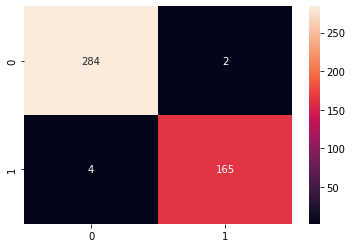

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))



Accuracy:- 0.9868131868131869
Sensitivity:- 0.9763313609467456
Specificity:- 0.993006993006993
F1-Score is:- 0.9821428571428571


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       286
           1       0.99      0.98      0.98       169

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



##### ROC on the train set

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_predicted_proba = logistic_model.predict_proba(X_train)[:,1]
Train_pred_proba_df["Model_lr"]=y_train_predicted_proba

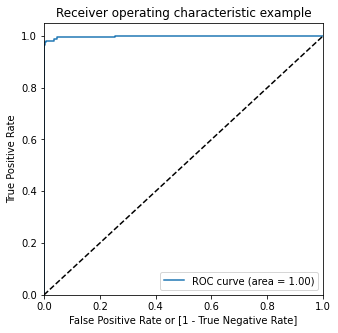

array([1.31545027e-02, 9.99999701e-01, 4.68115552e-07, 1.03829222e-02,
       8.02594155e-06, 9.99855000e-01, 2.54431889e-02, 6.86788023e-05,
       2.83698408e-03, 9.99892952e-01, 5.86492830e-02, 9.99995343e-01,
       9.99375886e-01, 3.86828945e-04, 3.21169071e-04, 9.99991933e-01,
       9.99718719e-01, 9.99905577e-01, 6.33931101e-03, 1.00694693e-04,
       1.78709181e-02, 9.66144322e-01, 3.59598140e-01, 3.35869827e-03,
       2.39658097e-01, 9.97257895e-01, 5.14686613e-04, 9.99999494e-01,
       6.68363260e-07, 9.11869304e-07, 9.98752066e-01, 1.15217278e-04,
       9.99995546e-01, 9.99780672e-01, 8.21147515e-01, 6.43264043e-05,
       9.89902733e-01, 5.44721656e-05, 8.75730294e-09, 2.20074358e-02,
       2.25454902e-05, 9.99999721e-01, 9.99576649e-01, 3.21536722e-07,
       7.16591068e-03, 4.66064115e-07, 2.94282520e-09, 2.81382458e-05,
       5.03046720e-06, 1.01449693e-03, 9.65842105e-01, 2.20439412e-04,
       5.81080431e-04, 5.14894515e-01, 2.49590564e-04, 9.92433164e-01,
      

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)
y_train_predicted_proba

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_predicted_proba)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9979310630198205


In [ ]:
Train_scr_df['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

# K-Fold Cross Validation Logistic Regression 

In [ ]:
score=cross_val_score(logistic_model, X_train, y_train, cv=10, scoring='f1')
print(f'Score Obtained:- {score}')

Score Obtained:- [1.         0.94444444 1.         0.90322581 1.         1.
 0.96969697 0.9375     0.94117647 0.94117647]


In [ ]:
print(f'Avg. Score->{score.mean()}')

Avg. Score->0.9637220161769499


#Determining Cutoff

In [ ]:
y_train_predicted_proba_logCutoff_df = pd.DataFrame( columns = ['Probabilistic_Val'])
y_train_predicted_proba_logCutoff_df['Probabilistic_Val']=y_train_predicted_proba

In [ ]:
numbers=[float(x)/10 for x in range (10)]
for i in numbers:
  y_train_predicted_proba_logCutoff_df[i]=np.where(y_train_predicted_proba > i, 1, 0)
y_train_predicted_proba_logCutoff_df

Probabilistic_Val  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9
0         1.315450e-02    1    0    0    0    0    0    0    0    0    0
1         9.999997e-01    1    1    1    1    1    1    1    1    1    1
2         4.681156e-07    1    0    0    0    0    0    0    0    0    0
3         1.038292e-02    1    0    0    0    0    0    0    0    0    0
4         8.025942e-06    1    0    0    0    0    0    0    0    0    0
..                 ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
450       1.599511e-07    1    0    0    0    0    0    0    0    0    0
451       1.050882e-01    1    1    0    0    0    0    0    0    0    0
452       7.379706e-06    1    0    0    0    0    0    0    0    0    0
453       9.814650e-01    1    1    1    1    1    1    1    1    1    1
454       6.098497e-03    1    0    0    0    0    0    0    0    0    0

[455 rows x 11 columns]

In [ ]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train, y_train_predicted_proba_logCutoff_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.371429  1.000000  0.000000
0.1   0.1  0.942857  0.994083  0.912587
0.2   0.2  0.967033  0.994083  0.951049
0.3   0.3  0.973626  0.982249  0.968531
0.4   0.4  0.986813  0.982249  0.989510
0.5   0.5  0.986813  0.976331  0.993007
0.6   0.6  0.984615  0.958580  1.000000
0.7   0.7  0.973626  0.928994  1.000000
0.8   0.8  0.971429  0.923077  1.000000
0.9   0.9  0.956044  0.881657  1.000000


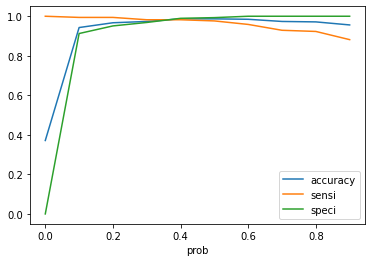

In [ ]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_predicted = logistic_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[70  1]
 [ 1 42]]


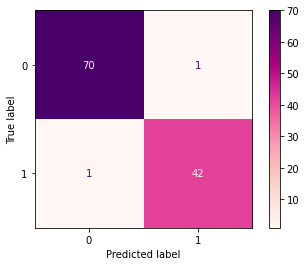

In [ ]:
plot_confusion_matrix(logistic_data, X_test, y_test, cmap='RdPu') 

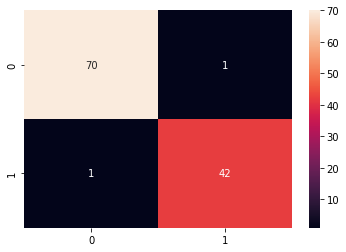

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.9824561403508771
Sensitivity:- 0.9767441860465116
Specificity:- 0.9859154929577465
F1-Score is:- 0.9767441860465116


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_predicted_proba = logistic_model.predict_proba(X_test)[:,1]

In [ ]:
Test_pred_proba_df["Model_lr"]=y_test_predicted_proba

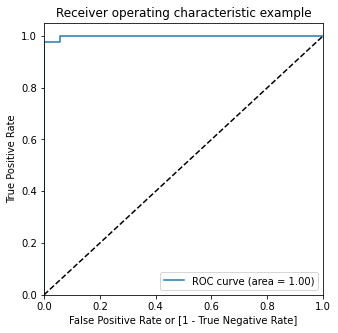

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.998689813298395


In [ ]:
Test_scr_df['Logistic Regression']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


In [ ]:
y_test_hat=np.where(y_test_predicted_proba > .35, 1, 0)

In [ ]:
print(classification_report(y_test, y_test_hat))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



***Model summary & Comparative Study***

In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression
0     Accuracy             0.986813
1  Sensitivity             0.976331
2  Specificity             0.993007
3     F1-Score             0.982143
4          ROC             0.997931



Test Set 
        Metrics  Logistic Regression
0     Accuracy             0.982456
1  Sensitivity             0.976744
2  Specificity             0.985915
3     F1-Score             0.976744
4          ROC             0.998690


Overall, the model is performing well in the test set, what it had learnt from the train set.

### XGBoost

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=24)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator= xgb_model, 
                        param_grid= param_grid, 
                        scoring= 'roc_auc', 
                        cv= folds, 
                        verbose= 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)       

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=24),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_result = pd.DataFrame(model_cv.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.064819      0.060152         0.004650        0.000552   
1       0.026934      0.000041         0.004198        0.000257   
2       0.028952      0.000184         0.006100        0.003004   
3       0.023107      0.002462         0.004032        0.000067   
4       0.030471      0.008103         0.004033        0.000089   
5       0.026753      0.000999         0.004514        0.000402   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.997582   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.995908   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.996838   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.996373   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.997210   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.996094   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.982456           0.993985         0.991341        0.006452   
1           0.978947           0.989944         0.988266        0.007025   
2           0.980055           0.990695         0.989196        0.006933   
3           0.984488           0.993985         0.991615        0.005133   
4           0.981902           0.987594         0.988902        0.006317   
5           0.976639           0.990977         0.987903        0.008234   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.996646            0.998411   
1                5            0.998696            0.998878   
2                3            0.999627            0.999766   
3                1            0.998789            0.999439   
4                4            1.000000            1.000000   
5                6            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.997776          0.997611     7.295934e-04  
1            0.999490          0.999021     3.398153e-04  
2            0.999676          0.999690     5.756831e-05  
3            0.998147          0.998792     5.276041e-04  
4            0.999954          0.999985     2.184147e-05  
5            1.000000          1.000000     6.409876e-17

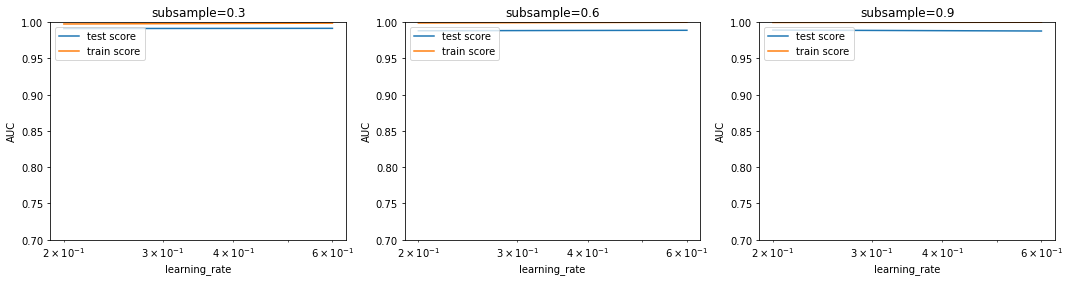

In [ ]:
# # plotting
plt.figure(figsize=(18,4))

param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_result[cv_result['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.70, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
print(f'Best Parameter {model_cv.best_params_}')

Best Parameter {'learning_rate': 0.6, 'subsample': 0.3}


In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':24,
          'subsample':0.3,
         'objective':'binary:logistic', 'eval_metric':'auc'}

# fit model on training data
xgb_model = XGBClassifier(
    n_estimators=24,
    max_depth=2,
    subsample=0.3
)
xgb_model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], eval_metric='auc', verbose=True)

[0]	validation_0-auc:0.948266	validation_1-auc:0.961841
[1]	validation_0-auc:0.977242	validation_1-auc:0.98133
[2]	validation_0-auc:0.983221	validation_1-auc:0.98133
[3]	validation_0-auc:0.98289	validation_1-auc:0.995087
[4]	validation_0-auc:0.983976	validation_1-auc:0.995414
[5]	validation_0-auc:0.986924	validation_1-auc:0.994759
[6]	validation_0-auc:0.987007	validation_1-auc:0.99394
[7]	validation_0-auc:0.99101	validation_1-auc:0.995578
[8]	validation_0-auc:0.991093	validation_1-auc:0.995251
[9]	validation_0-auc:0.991155	validation_1-auc:0.995251
[10]	validation_0-auc:0.992314	validation_1-auc:0.995087
[11]	validation_0-auc:0.993545	validation_1-auc:0.995414
[12]	validation_0-auc:0.993752	validation_1-auc:0.996069
[13]	validation_0-auc:0.994548	validation_1-auc:0.996725
[14]	validation_0-auc:0.994983	validation_1-auc:0.99738
[15]	validation_0-auc:0.994983	validation_1-auc:0.997707
[16]	validation_0-auc:0.995128	validation_1-auc:0.998035
[17]	validation_0-auc:0.995417	validation_1-auc

XGBClassifier(max_depth=2, n_estimators=24, subsample=0.3)

In [ ]:
xgb_model.n_estimators

24

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = xgb_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train_predicted)
print(conf_mat)

[[283   3]
 [  8 161]]


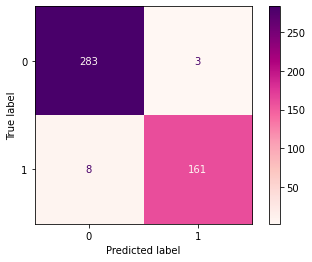

In [ ]:
plot_confusion_matrix(xgb_model, X_train, y_train, cmap='RdPu') 

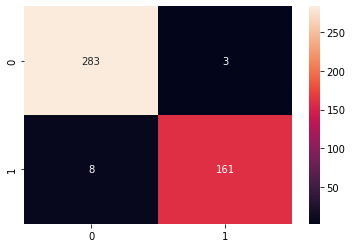

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.9758241758241758
Sensitivity:- 0.9526627218934911
Specificity:- 0.9895104895104895
F1-Score is:- 0.9669669669669669


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       286
           1       0.98      0.95      0.97       169

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.97       455
weighted avg       0.98      0.98      0.98       455



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgboost = xgb_model.predict_proba(X_train)[:,1]
Train_pred_proba_df["Model_xgb"]=y_train_pred_proba_imb_xgboost

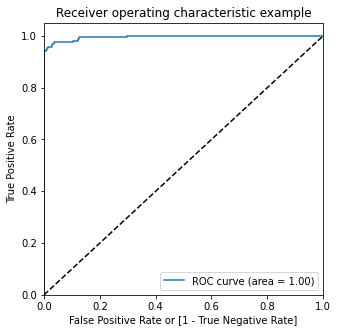

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgboost)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgboost)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9954276492738031


In [ ]:
Train_scr_df['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


#K-Fold Cross Validation for XGBoost (10 Fold)

In [ ]:
score=cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='f1')
print(score)
print(f'Avg. Score ={score.mean()}')


[0.96969697 0.96969697 0.9375     0.85714286 0.94117647 0.96969697
 0.9375     0.96969697 0.96969697 0.84848485]
Avg. Score =0.9370289024700789


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = xgb_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[69  2]
 [ 3 40]]


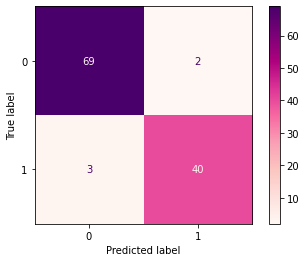

In [ ]:
plot_confusion_matrix(xgb_model, X_test, y_test, cmap='RdPu') 

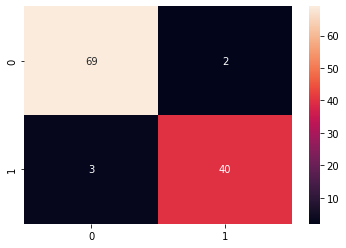

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.956140350877193
Sensitivity:- 0.9302325581395349
Specificity:- 0.971830985915493
F1-Score is:- 0.9411764705882352


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))


              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Predicted probability
y_test_predicted_proba = xgb_model.predict_proba(X_test)[:,1]
Test_pred_proba_df["Model_xgb"]=y_test_predicted_proba

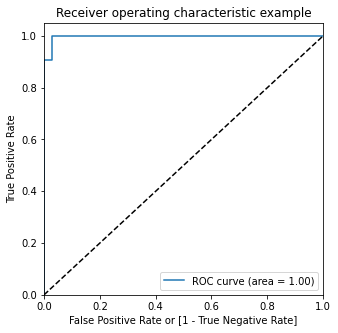

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.99737962659679


In [ ]:
Test_scr_df['XGBoost']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]


***Model summary & Comarative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.986813  0.975824
1  Sensitivity             0.976331  0.952663
2  Specificity             0.993007  0.989510
3     F1-Score             0.982143  0.966967
4          ROC             0.997931  0.995428



Test Set 
        Metrics  Logistic Regression   XGBoost
0     Accuracy             0.982456  0.956140
1  Sensitivity             0.976744  0.930233
2  Specificity             0.985915  0.971831
3     F1-Score             0.976744  0.941176
4          ROC             0.998690  0.997380



Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dec_tree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator= dec_tree, 
                           param_grid= param_grid, 
                           scoring= 'roc_auc',
                           cv= 3, 
                           verbose= 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_result= pd.DataFrame(grid_search.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.006000      0.002337         0.003518        0.000610   
1       0.004330      0.000210         0.003043        0.000325   
2       0.003309      0.000169         0.002678        0.000083   
3       0.003413      0.000070         0.002696        0.000055   
4       0.004360      0.000238         0.003292        0.000243   
5       0.004452      0.000348         0.003160        0.000291   
6       0.003856      0.000184         0.003418        0.000247   
7       0.003477      0.000187         0.002875        0.000198   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.954241   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.954241   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.934803   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.934803   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.954241   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.954241   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.934803   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.934803   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.965559           0.940789         0.953530        0.010124   
1           0.959834           0.941353         0.951809        0.007738   
2           0.907018           0.906391         0.916070        0.013248   
3           0.907018           0.913910         0.918577        0.011814   
4           0.961496           0.940789         0.952175        0.008579   
5           0.952170           0.941635         0.949349        0.005519   
6           0.907018           0.913910         0.918577        0.011814   
7           0.907018           0.913910         0.918577        0.011814   

   rank_test_score  
0                1  
1                3  
2                8  
3                5  
4                2  
5                4  
6                5  
7                5

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9535297261794837
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = dt_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train)
print(conf_mat)

[[286   0]
 [  0 169]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.9208791208791208
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score is:- 0.8947368421052632


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       286
           1       0.88      0.91      0.89       169

    accuracy                           0.92       455
   macro avg       0.91      0.92      0.92       455
weighted avg       0.92      0.92      0.92       455



In [ ]:
# Predicted probability
y_train_predicted_proba = dt_model.predict_proba(X_train)[:,1]
Train_pred_proba_df["Model_dt"]=y_train_predicted_proba

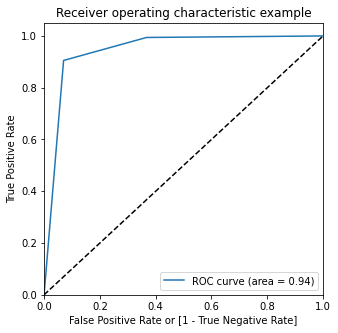

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)


In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_predicted_proba)
print("ROC-AUC found on the train set",ROC_auc_var)

ROC-AUC found on the train set 0.9449042082178176


In [ ]:
Train_scr_df['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = dt_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[63  8]
 [ 4 39]]


In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.8947368421052632
Sensitivity:- 0.9069767441860465
Specificity:- 0.8873239436619719
F1-Score is:- 0.8666666666666666


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91        71
           1       0.83      0.91      0.87        43

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [ ]:
# Predicted probability
y_test_predicted_proba = dt_model.predict_proba(X_test)[:,1]
Test_pred_proba_df["Model_dt"]=y_test_predicted_proba

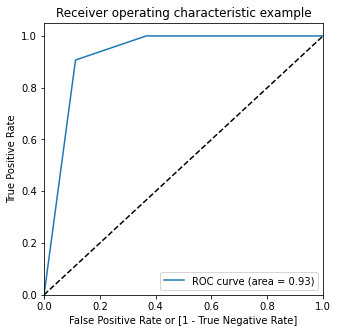

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9266295447101212


In [ ]:
Test_scr_df['Decision Tree']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.986813  0.975824       0.920879
1  Sensitivity             0.976331  0.952663       1.000000
2  Specificity             0.993007  0.989510       1.000000
3     F1-Score             0.982143  0.966967       0.894737
4          ROC             0.997931  0.995428       0.944904



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree
0     Accuracy             0.982456  0.956140       0.894737
1  Sensitivity             0.976744  0.930233       0.906977
2  Specificity             0.985915  0.971831       0.887324
3     F1-Score             0.976744  0.941176       0.866667
4          ROC             0.998690  0.997380       0.926630


### Random forest

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rnd_f = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rnd_f, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('Accuracy:-',grid_search.best_score_,'using',grid_search.best_params_)

Accuracy:- 0.9120585052940722 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 300}


In [ ]:
grid_search.best_params_

{'max_depth': 5,
 'max_features': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'n_estimators': 300}

In [ ]:
# cv results
cv_result= pd.DataFrame(grid_search.cv_results_)
cv_result

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.250262      0.007990         0.028674        0.001429   
1        0.518248      0.004892         0.042261        0.000381   
2        0.724067      0.019177         0.067657        0.001438   
3        0.238759      0.002900         0.024236        0.000538   
4        0.468001      0.002299         0.046438        0.002560   
5        0.704606      0.008504         0.062542        0.000441   
6        0.210556      0.000297         0.028414        0.002900   
7        0.432273      0.010776         0.052904        0.002886   
8        0.641853      0.001209         0.061144        0.000139   
9        0.206927      0.001976         0.022789        0.000134   
10       0.425002      0.000051         0.042967        0.000118   
11       0.622912      0.004086         0.061766        0.000342   
12       0.273838      0.007185         0.058533        0.034809   
13       1.269884      0.018336         0.046581        0.004419   
14       0.760024      0.000524         0.062537        0.000026   
15       0.240946      0.000620         0.025337        0.002623   
16       0.515746      0.020042         0.043195        0.000284   
17       0.730867      0.011254         0.076249        0.006662   
18       0.212728      0.001579         0.027564        0.002501   
19       0.431158      0.000295         0.045307        0.003410   
20       0.654058      0.008549         0.066322        0.003455   
21       0.228265      0.003414         0.023514        0.000177   
22       0.445388      0.002641         0.047822        0.003839   
23       0.639867      0.015878         0.061281        0.010794   

   param_max_depth param_max_features param_min_samples_leaf  \
0                5                 10                     50   
1                5                 10                     50   
2                5                 10                     50   
3                5                 10                     50   
4                5                 10                     50   
5                5                 10                     50   
6                5                 10                    100   
7                5                 10                    100   
8                5                 10                    100   
9                5                 10                    100   
10               5                 10                    100   
11               5                 10                    100   
12               5                 20                     50   
13               5                 20                     50   
14               5                 20                     50   
15               5                 20                     50   
16               5                 20                     50   
17               5                 20                     50   
18               5                 20                    100   
19               5                 20                    100   
20               5                 20                    100   
21               5                 20                    100   
22               5                 20                    100   
23               5                 20                    100   

   param_min_samples_split param_n_estimators  \
0                       50                100   
1                       50                200   
2                       50                300   
3                      100                100   
4                      100                200   
5                      100                300   
6                       50                100   
7                       50                200   
8                       50                300   
9                      100                100   
10                     100                200   
11                     100                300   
12                      50                100   
13              

In [ ]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# Fit the model
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=200)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_predicted = rfc_model.predict(X_train)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_train, y_train_predicted)
print(conf_mat)

[[278   8]
 [ 11 158]]


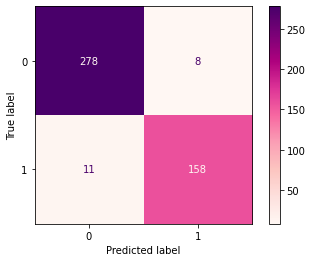

In [ ]:
plot_confusion_matrix(rfc_model, X_train, y_train, cmap='RdPu') 

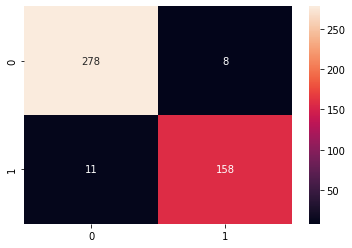

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_train, y_train_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_train, y_train_predicted)
print("F1-Score is:-", f1_score(y_train, y_train_predicted))

Accuracy:- 0.9582417582417583
Sensitivity:- 0.9349112426035503
Specificity:- 0.972027972027972
F1-Score is:- 0.9432835820895522


In [ ]:
# classification_report
print(classification_report(y_train, y_train_predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       286
           1       0.95      0.93      0.94       169

    accuracy                           0.96       455
   macro avg       0.96      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



In [ ]:
# Predicted probability
y_train_predicted_proba = rfc_model.predict_proba(X_train)[:,1]
Train_pred_proba_df["Model_rfc"]=y_train_predicted_proba

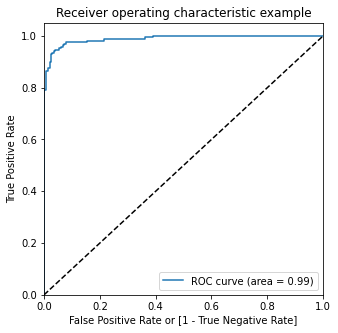

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_train, y_train_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9889725658956428


In [ ]:
Train_scr_df['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

# K Fold Cross Validation for Random Forest(10 Fold)

In [ ]:
score=cross_val_score(rfc_model, X_train, y_train, cv=10, scoring='f1')
print(score)
print(f'Avg. Score ={score.mean()}')

[1.         0.90909091 0.90322581 0.875      0.94117647 0.90909091
 0.85714286 0.875      0.9375     0.88235294]
Avg. Score =0.9089579893540994


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_predicted = rfc_model.predict(X_test)

In [ ]:
# Confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_test_predicted)
print(conf_mat)

[[69  2]
 [ 3 40]]


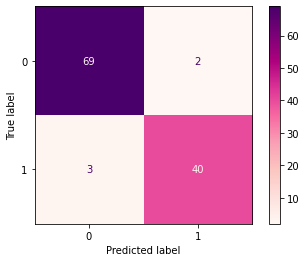

In [ ]:
plot_confusion_matrix(rfc_model, X_test, y_test, cmap='RdPu') 

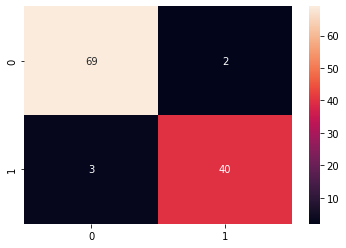

In [ ]:
sns.heatmap(conf_mat,annot=True,fmt="d")

In [ ]:
TP = conf_mat[1,1] # true positive 
TN = conf_mat[0,0] # true negatives
FP = conf_mat[0,1] # false positives
FN = conf_mat[1,0] # false negatives

In [ ]:
# Accuracy
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.956140350877193
Sensitivity:- 0.9302325581395349
Specificity:- 0.971830985915493
F1-Score is:- 0.9411764705882352


In [ ]:
# classification_report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# Predicted probability
y_test_predicted_proba = rfc_model.predict_proba(X_test)[:,1]
Test_pred_proba_df["Model_rfc"]=y_test_predicted_proba

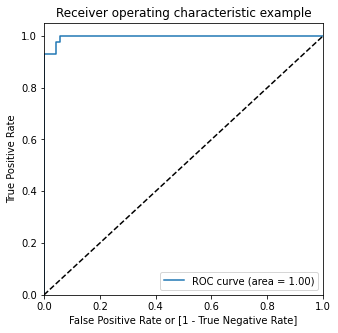

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_predicted_proba)

In [ ]:
ROC_auc_var = metrics.roc_auc_score(y_test, y_test_predicted_proba)
print("ROC-AUC found on the test set",ROC_auc_var)

ROC-AUC found on the test set 0.9967245332459875


In [ ]:
Test_scr_df['Random Forest']=[Accuracy_var,Sensitivity_var,Specificity_var,F1_Score_var,ROC_auc_var]

***Model summary & Comparative Study***


In [ ]:
print("Train Set \n",Train_scr_df)
print("\n\n")
print("Test Set \n",Test_scr_df)

Train Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.986813  0.975824       0.920879       0.958242
1  Sensitivity             0.976331  0.952663       1.000000       0.934911
2  Specificity             0.993007  0.989510       1.000000       0.972028
3     F1-Score             0.982143  0.966967       0.894737       0.943284
4          ROC             0.997931  0.995428       0.944904       0.988973



Test Set 
        Metrics  Logistic Regression   XGBoost  Decision Tree  Random Forest
0     Accuracy             0.982456  0.956140       0.894737       0.956140
1  Sensitivity             0.976744  0.930233       0.906977       0.930233
2  Specificity             0.985915  0.971831       0.887324       0.971831
3     F1-Score             0.976744  0.941176       0.866667       0.941176
4          ROC             0.998690  0.997380       0.926630       0.996725


In [ ]:
Train_pred_proba_df

Model_lr  Model_xgb  Model_dt  Model_rfc
0    1.315450e-02   0.352298  0.005495   0.370516
1    9.999997e-01   0.947399  0.884393   0.967355
2    4.681156e-07   0.054965  0.005495   0.012718
3    1.038292e-02   0.128204  0.005495   0.031498
4    8.025942e-06   0.104070  0.005495   0.020684
..            ...        ...       ...        ...
450  1.599511e-07   0.056909  0.005495   0.034530
451  1.050882e-01   0.082569  0.005495   0.109613
452  7.379706e-06   0.070636  0.150000   0.077513
453  9.814650e-01   0.882219  0.884393   0.771743
454  6.098497e-03   0.063664  0.005495   0.036473

[455 rows x 4 columns]

In [ ]:
Test_pred_proba_df

Model_lr  Model_xgb  Model_dt  Model_rfc
0    0.293648   0.079825  0.150000   0.136163
1    0.999931   0.925345  0.884393   0.953605
2    0.999502   0.938336  0.884393   0.894806
3    0.000108   0.067852  0.005495   0.049400
4    0.000013   0.051000  0.005495   0.018415
..        ...        ...       ...        ...
109  0.029900   0.186533  0.150000   0.190196
110  0.999039   0.938336  0.884393   0.888200
111  0.000986   0.051000  0.005495   0.026377
112  0.602043   0.203588  0.150000   0.259823
113  1.000000   0.938450  0.884393   0.957994

[114 rows x 4 columns]

In [ ]:
# make a prediction with a stacking ensemble
from sklearn.datasets import make_classification
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# define the base models
level0 = list()
level0.append(('lr', LogisticRegression(C=1)))
level0.append(('XGB', XGBClassifier(learning_rate = 0.2,
																			max_depth=2, 
																			n_estimators=200,
																			subsample=0.3,
																		  objective='binary:logistic')))
level0.append(('rfc', RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)))
# define meta learner model
level1 = LogisticRegression()
# define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=10)
# fit the model on all available data
model.fit(X, y)
yhat = model.predict(X)
#print('Predicted Class: %d' % (yhat))
score = accuracy_score(y, yhat)
print(score)

0.9912126537785588


In [ ]:
from numpy import hstack
from sklearn.datasets import make_classification
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

 
# get the dataset
def get_dataset():
	X, y = make_classification(n_samples=10000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
	return X, y
 
# get a list of base models
def get_models():
	models = list()
	models.append(('lr', LogisticRegression(C=1)))
	models.append(('XGB', XGBClassifier(learning_rate = 0.2,
																			max_depth=2, 
																			n_estimators=200,
																			subsample=0.3,
																		  objective='binary:logistic')))
	models.append(('rfc', RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=10,
                             n_estimators=200)))
	return models
 
# fit the blending ensemble
def fit_ensemble(models, X_train, X_test, y_train, y_test):
	# fit all models on the training set and predict on hold out set
	meta_X = list()
	for name, model in models:
		# fit in training set
		model.fit(X_train, y_train)
		# predict on hold out set
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store predictions as input for blending
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# define blending model
	blender = LogisticRegression()
	# fit on predictions from base models
	blender.fit(meta_X, y_test)
	return blender
 
# make a prediction with the blending ensemble
def predict_ensemble(models, blender, X_test):
	# make predictions with base models
	meta_X = list()
	for name, model in models:
		# predict with base model
		yhat = model.predict(X_test)
		# reshape predictions into a matrix with one column
		yhat = yhat.reshape(len(yhat), 1)
		# store prediction
		meta_X.append(yhat)
	# create 2d array from predictions, each set is an input feature
	meta_X = hstack(meta_X)
	# predict
	return blender.predict(meta_X)
 
# define dataset

models = get_models()
# train the blending ensemble
blender = fit_ensemble(models, X_train, X_test, y_train, y_test)
# make predictions on test set
yhat = predict_ensemble(models, blender, X_test)
# evaluate predictions
score = accuracy_score(y_test, yhat)
print('Blending Accuracy: %.3f' % (score*100))

Blending Accuracy: 97.368


# OPTIMIZATION

In [ ]:
CutOff_lst=[]
f1_score_lst=[]

In [ ]:
def findCutOff(x):
  #preds = np.where(logistic_model.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
  preds = np.where(Train_pred_proba_df["Model_lr"] > x[0], 1, 0)
  #print(preds)
  return 1/f1_score(y_train, preds)

In [ ]:
# Optimisation to find cutoff
from scipy.optimize import Bounds
#x_bounds = (0, 1)
bounds = Bounds([0], [1])
from scipy.optimize import minimize


In [ ]:
# perform the search (1)
result_cutoff1 = minimize(findCutOff, (0.6,), method='nelder-mead', bounds=bounds)
print(result_cutoff1)

 final_simplex: (array([[0.57      ],
       [0.56994141]]), array([1.01840491, 1.01840491]))
           fun: 1.01840490797546
       message: 'Optimization terminated successfully.'
          nfev: 30
           nit: 11
        status: 0
       success: True
             x: array([0.57])


In [ ]:
# perform the search (2)
result_cutoff2 = minimize(findCutOff, (0.8,), method='trust-constr', bounds=bounds)
print(result_cutoff2)

 barrier_parameter: 5.120000000000003e-08
 barrier_tolerance: 5.120000000000003e-08
          cg_niter: 2
      cg_stop_cond: 0
            constr: [array([0.63885972])]
       constr_nfev: [0]
       constr_nhev: [0]
       constr_njev: [0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.08898544311523438
               fun: 1.021604938271605
              grad: array([0.])
               jac: [<1x1 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>]
   lagrangian_grad: array([5.54353147e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 6
              nhev: 0
               nit: 12
             niter: 12
              njev: 3
        optimality: 5.543531474478177e-09
            status: 1
           success: True
         tr_radius: 9391569.847184813
                 v: [array([5.54353147e-09])]
                 x: array([0.63885

In [ ]:
result_cutoff1.x[0]

0.57

In [ ]:
result_cutoff2.x[0]

0.6388597220685799

In [ ]:

def findWeight(w):
  THRESHOLD = result_cutoff1.x[0] # Got from previous optimisation
  yhat_perd_prabability=Train_pred_proba_df["Model_lr"]*w[0]+Train_pred_proba_df["Model_lr"]*w[1]+Train_pred_proba_df["Model_lr"]*w[2]
  Train_pred_proba_df["Model_Blending"]=yhat_perd_prabability
  yhat=  np.where(yhat_perd_prabability > THRESHOLD, 1, 0)
  
  return 1/f1_score(y_train, yhat)

In [ ]:
# Optimisation to find weight variables
b = Bounds([0,0,0], [1,1,1])

from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint([[1, 1, 1]], [0], [1])

from scipy.optimize import minimize


In [ ]:
result_wt1 = minimize(findWeight, (0.3,0.3,0.4), method='trust-constr', constraints=[linear_constraint], bounds=b)
print(result_wt1)

 barrier_parameter: 2.560000000000001e-07
 barrier_tolerance: 2.560000000000001e-07
          cg_niter: 3
      cg_stop_cond: 0
            constr: [array([0.7577903]), array([0.24537568, 0.24537568, 0.26703894])]
       constr_nfev: [0, 0]
       constr_nhev: [0, 0]
       constr_njev: [0, 0]
    constr_penalty: 1.0
  constr_violation: 0.0
    execution_time: 0.056711673736572266
               fun: 1.0382165605095544
              grad: array([0., 0., 0.])
               jac: [array([[1, 1, 1]]), array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])]
   lagrangian_grad: array([-1.15020189e-09, -1.15020189e-09,  4.28728646e-09])
           message: '`gtol` termination condition is satisfied.'
            method: 'tr_interior_point'
              nfev: 16
              nhev: 0
               nit: 12
             niter: 12
              njev: 4
        optimality: 4.287286463947946e-09
            status: 1
           success: True
         tr_radius: 2758730.673167669
       

In [ ]:
result_wt2 = minimize(findWeight, (0.3,0.3,0.4), method='nelder-mead', constraints=[linear_constraint], bounds=b)
print(result_wt2)

 final_simplex: (array([[0.3       , 0.3       , 0.4       ],
       [0.30005859, 0.3       , 0.4       ],
       [0.3       , 0.30005859, 0.4       ],
       [0.3       , 0.3       , 0.40007813]]), array([1.01840491, 1.01840491, 1.01840491, 1.01840491]))
           fun: 1.01840490797546
       message: 'Optimization terminated successfully.'
          nfev: 44
           nit: 9
        status: 0
       success: True
             x: array([0.3, 0.3, 0.4])


In [ ]:
print(f'Cut-Off Using Nelder-Mead: {result_cutoff1.x[0]}')
print(f'f1_score Using Cut-off Obtained by Nelder-Mead Optimization= {1/result_cutoff1.fun}')

Cut-Off Using Nelder-Mead: 0.57
f1_score Using Cut-off Obtained by Nelder-Mead Optimization= 0.9819277108433736


In [ ]:
print(f'Cut-Off obtained using trust-constr: {result_cutoff2.x[0]}')
print(f'f1_score using cutoff obtained using trust-constr optimization= {1/result_cutoff2.fun}')

Cut-Off obtained using trust-constr: 0.6388597220685799
f1_score using cutoff obtained using trust-constr optimization= 0.9788519637462235


In [ ]:
print(f'Weights obtained of blending model using trust-constr optimization: {result_wt1.x}')
print(f'f1_score= {1/result_cutoff2.fun}')

Weights obtained of blending model using trust-constr optimization: [0.24537568 0.24537568 0.26703894]
f1_score= 0.9788519637462235


In [ ]:
print(f'Weights obtained of blending model using Nelder-Mead Optimization: {result_wt2.x}')
print(f'f1_score= {1/result_wt2.fun}')

Weights obtained of blending model using Nelder-Mead Optimization: [0.3 0.3 0.4]
f1_score= 0.9819277108433736


In [ ]:
Train_pred_proba_df

Model_lr  Model_xgb  Model_dt  Model_rfc  Model_Blending
0    1.315450e-02   0.352298  0.005495   0.339250    1.315553e-02
1    9.999997e-01   0.947399  0.884393   0.968254    1.000078e+00
2    4.681156e-07   0.054965  0.005495   0.011902    4.681521e-07
3    1.038292e-02   0.128204  0.005495   0.028497    1.038373e-02
4    8.025942e-06   0.104070  0.005495   0.014465    8.026569e-06
..            ...        ...       ...        ...             ...
450  1.599511e-07   0.056909  0.005495   0.037596    1.599636e-07
451  1.050882e-01   0.082569  0.005495   0.132297    1.050964e-01
452  7.379706e-06   0.070636  0.150000   0.062821    7.380282e-06
453  9.814650e-01   0.882219  0.884393   0.751805    9.815417e-01
454  6.098497e-03   0.063664  0.005495   0.028126    6.098973e-03

[455 rows x 5 columns]

In [ ]:
  
THRESHOLD=0.48
yhat=  np.where(Train_pred_proba_df["Model_Blending"] > THRESHOLD, 1, 0)
  
f1_score(y_train, yhat)


  

0.9821428571428571

In [ ]:
metrics.accuracy_score(y_train, yhat)

0.9868131868131869

In [ ]:
Accuracy_var=metrics.accuracy_score(y_test, y_test_predicted)
print("Accuracy:-",Accuracy_var)

# Sensitivity
Sensitivity_var=TP / float(TP+FN)
print("Sensitivity:-",Sensitivity_var)

# Specificity
Specificity_var=TN / float(TN+FP)
print("Specificity:-", Specificity_var)

# F1 score
F1_Score_var=f1_score(y_test, y_test_predicted)
print("F1-Score is:-", f1_score(y_test, y_test_predicted))

Accuracy:- 0.956140350877193
Sensitivity:- 0.9302325581395349
Specificity:- 0.971830985915493
F1-Score is:- 0.9411764705882352


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

explainer = shap.KernelExplainer(logistic_data.predict, X_test)
shap_values = explainer.shap_values(X_test, nsamples=100)

  0%|          | 0/114 [00:00<?, ?it/s]

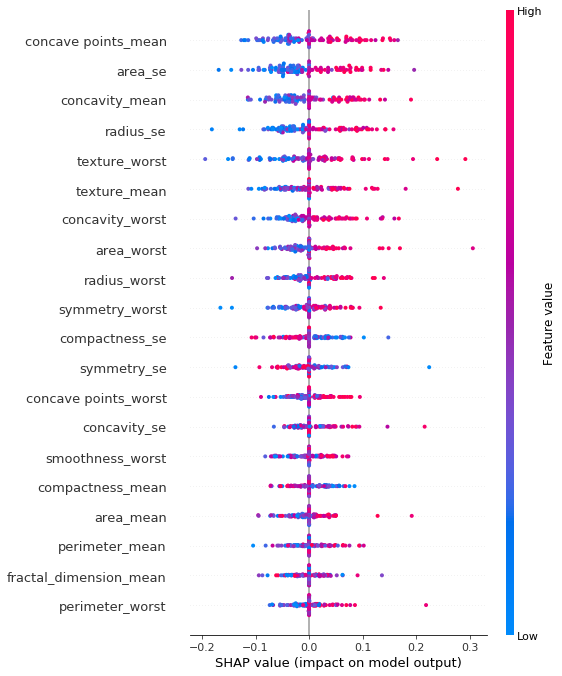

In [ ]:
shap.summary_plot(shap_values, X_test)

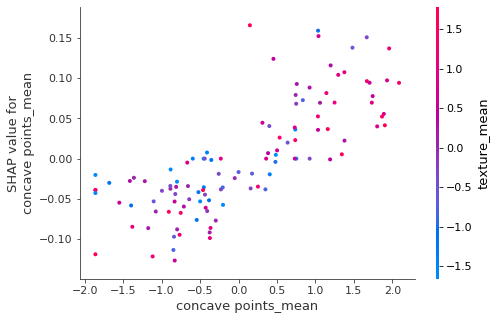

In [ ]:
shap.dependence_plot("concave points_mean", shap_values, X_test)

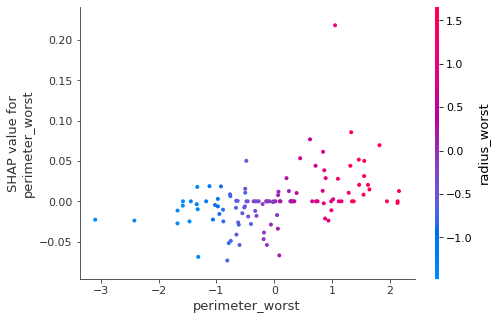

In [ ]:
shap.dependence_plot('perimeter_worst', shap_values, X_test)

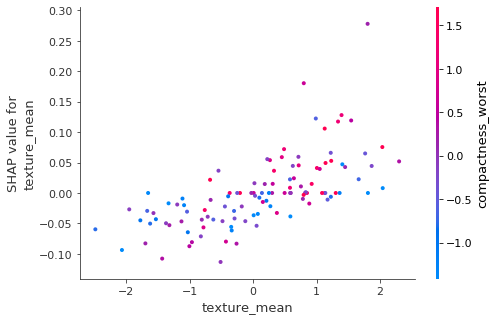

In [ ]:
shap.dependence_plot('texture_mean', shap_values, X_test)

In [ ]:
shap.initjs()
# plot the SHAP values for the 10th observation 
shap.force_plot(explainer.expected_value, shap_values[10,:], X_test.iloc[10,:])

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

In [ ]:
pip install pdpbox 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


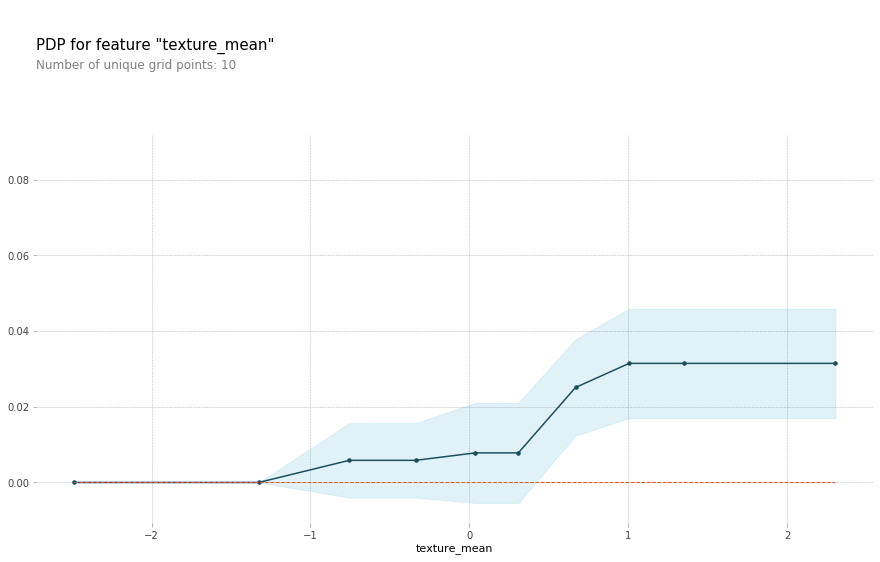

In [ ]:
from pdpbox import pdp, get_dataset, info_plots

pdp_ = pdp.pdp_isolate(model = xgb_model, dataset = X_test, model_features = np.array(X.columns), feature = 'texture_mean')

pdp.pdp_plot(pdp_, 'texture_mean')
plt.show()

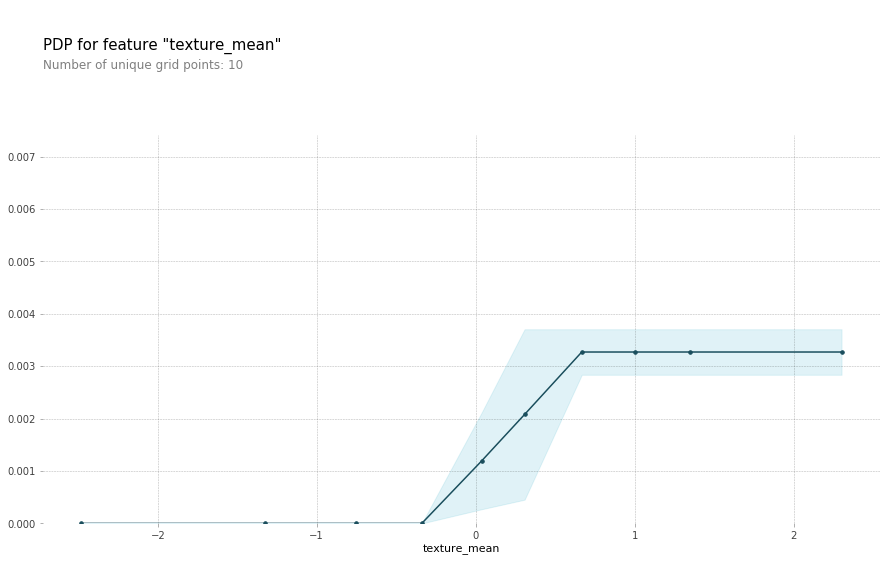

In [ ]:
pdp_ = pdp.pdp_isolate(model = rfc_model, dataset = X_test, model_features = np.array(X.columns), feature = 'texture_mean')

pdp.pdp_plot(pdp_, 'texture_mean')
plt.show()

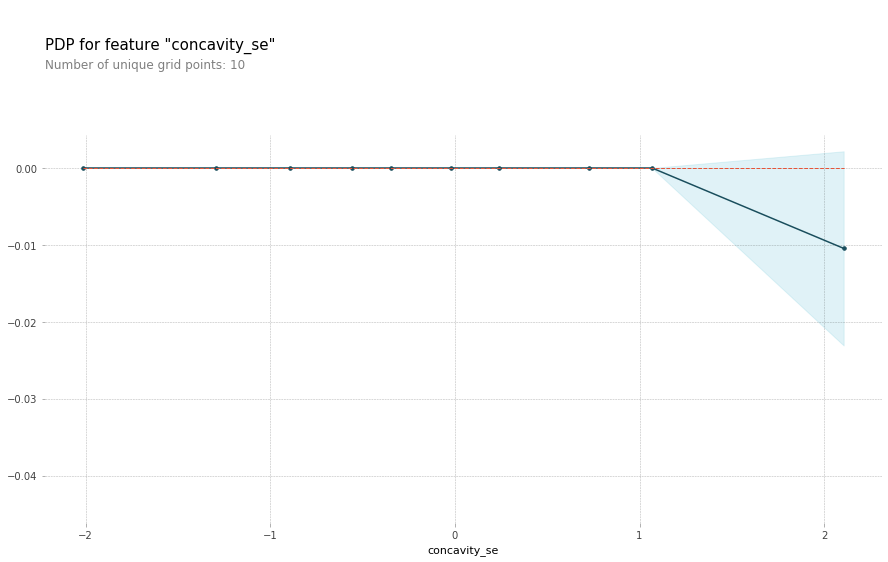

In [ ]:
pdp_ = pdp.pdp_isolate(model = xgb_model, dataset = X_test, model_features = np.array(X.columns), feature = 'concavity_se')

pdp.pdp_plot(pdp_, 'concavity_se')
plt.show()

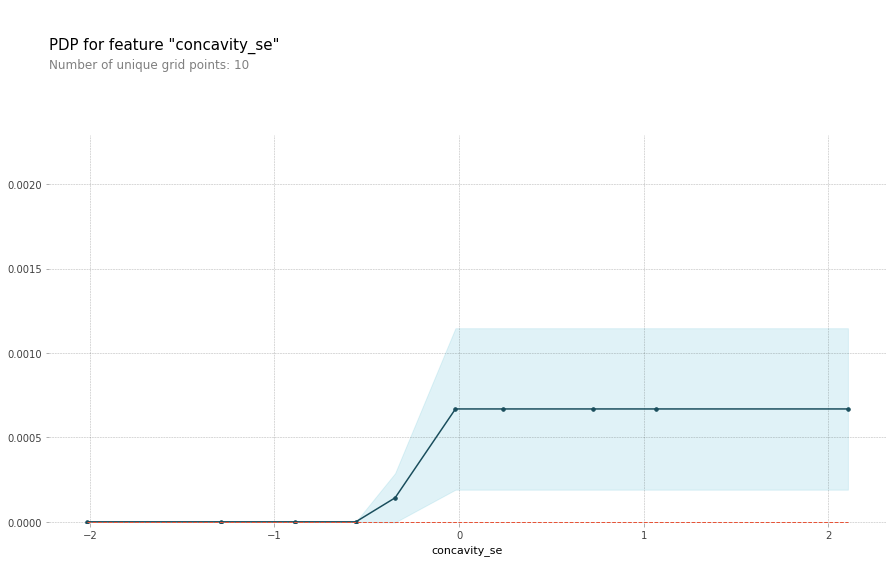

In [ ]:
pdp_ = pdp.pdp_isolate(model = rfc_model, dataset = X_test, model_features = np.array(X.columns), feature = 'concavity_se')

pdp.pdp_plot(pdp_, 'concavity_se')
plt.show()